In [1]:
 %pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from pylab import *
from scipy import *
from scipy import stats, io
import numpy as np
import struct
import tables as tb
from attrdict import AttrDict
import matplotlib.pyplot as plt
import os as os
from phy.io import KwikModel
import codecs as codecs
import matplotlib.gridspec as gridspec
import matplotlib.ticker as mtick

from scipy.stats import poisson


In [3]:
#----------------------------------------------------------------------------------------
#SAVING BINARY OBJECTS DATA
#need to automate data folder creation
#----------------------------------------------------------------------------------------
import pickle 

def save_obj(obj, name ):
    with open( name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open( name + '.pkl', 'rb') as f:
        return pickle.load(f)

# Experiment Files and Folders

In [4]:
# In this cell you put all the information to make the code portable from computer to computer
# You have to place all the file names and experiments, then you loop whichever you want to analyse
#--------------------------------------------------------------------------------
#Experiment numbers
ExpeNum = [20,22,23,24,25,26,27,28,29,30,31,32]

#--------------------------------------------------------------------------------
#Folders for measurements and experiments (this is how we separate shanks in folders for individual analyses)
m164 = ['m1s1','m1s2','m1s3','m1s4','m1s5','m1s6','m1s7','m1s8']
m264 = ['m2s1','m2s2','m2s3','m2s4','m2s5','m2s6','m2s7','m2s8']
m364 = ['m3s1','m3s2','m3s3','m3s4','m3s5','m3s6','m3s7','m3s8']
m464 = ['m4s1','m4s2','m4s3','m4s4','m4s5','m4s6','m4s7','m4s8']

#--------------------------------------------------------------------------------
#Kwik files    

files20 = [ 'MEAS-150707-1_ele01_ele08.kwik',
            'MEAS-150707-1_ele09_ele16.kwik',
            'MEAS-150707-1_ele17_ele24.kwik',
            'MEAS-150707-1_ele25_ele32.kwik',
            'MEAS-150707-23_ele01_ele08.kwik',
            'MEAS-150707-23_ele16_ele09.kwik']#,
            #'MEAS-150707-23_ele17_ele24.kwik',  not in S2
            #'MEAS-150707-23_ele25_ele32.kwik',] not in S2

files22 = [ 'MEAS-150716-12_ele01_ele08.kwik',
            'MEAS-150716-12_ele09_ele16.kwik',
            'MEAS-150716-12_ele17_ele24.kwik',
            'MEAS-150716-12_ele25_ele32.kwik',
            'MEAS-150716-3_ele01_ele08.kwik',
            'MEAS-150716-3_ele09_ele16.kwik',
            'MEAS-150716-3_ele17_ele24.kwik',
            'MEAS-150716-3_ele25_ele32.kwik',]

files23 = [ 'MEAS-151027-1_ele01_ele08.kwik',
            'MEAS-151027-1_ele09_ele16.kwik',
            #'MEAS-151027-1_ele17_ele24.kwik', out of S2
            #'MEAS-151027-1_ele25_ele32.kwik', out of S2
            #'MEAS-151027-1_ele33_ele40.kwik', out of S2
            #'MEAS-151027-1_ele41_ele48.kwik', out of S2
            #'MEAS-151027-1_ele49_ele56.kwik', out of S2
            #'MEAS-151027-1_ele57_ele64.kwik', out of S2
            'MEAS-151027-2_ele01_ele08.kwik',
            'MEAS-151027-2_ele09_ele16.kwik',
            'MEAS-151027-2_ele17_ele24.kwik',
            'MEAS-151027-2_ele25_ele32.kwik',
            'MEAS-151027-2_ele33_ele40.kwik']#,
            #'MEAS-151027-2_ele41_ele48.kwik',  out of S2
            #'MEAS-151027-2_ele49_ele56.kwik',  out of S2
            #'MEAS-151027-2_ele57_ele64.kwik']  out of S2

files24 = [#'MEAS-151103-1_EXTRACTED_ele25_ele32.kwik',  no functional responses
           'MEAS-151103-1_EXTRACTED_ele33_ele40.kwik',  
           'MEAS-151103-1_EXTRACTED_ele41_ele48.kwik',  
           'MEAS-151103-1_EXTRACTED_ele49_ele56.kwik',  
           'MEAS-151103-1_EXTRACTED_ele57_ele64.kwik',
           #'MEAS-151103-2_ele33_ele40.kwik',   no units
           'MEAS-151103-2_ele41_ele48.kwik',
           'MEAS-151103-2_ele49_ele56.kwik',
           'MEAS-151103-2_ele57_ele64.kwik']

#OUT OF S2
files25 = [ 'MEAS-151105-1good_ele01_ele08.kwik',
            'MEAS-151105-1good_ele09_ele16.kwik',
            'MEAS-151105-1good_ele17_ele24.kwik',
            'MEAS-151105-1good_ele25_ele32.kwik',
            'MEAS-151105-1good_ele33_ele40.kwik',
            'MEAS-151105-1good_ele41_ele48.kwik',
            'MEAS-151105-1good_ele49_ele56.kwik',
            'MEAS-151105-1good_ele57_ele64.kwik',
            'MEAS-151105-2_ele01_ele08.kwik',
            'MEAS-151105-2_ele09_ele16.kwik',
            'MEAS-151105-2_ele17_ele24.kwik',
            'MEAS-151105-2_ele25_ele32.kwik',
            'MEAS-151105-2_ele33_ele40.kwik',
            'MEAS-151105-2_ele41_ele48.kwik',
            'MEAS-151105-2_ele49_ele56.kwik',
            'MEAS-151105-2_ele57_ele64.kwik']

files26 = [ 'MEAS-151110-1_ele01_ele08.kwik',
            'MEAS-151110-1_ele09_ele16.kwik',
            'MEAS-151110-1_ele17_ele24.kwik',
            'MEAS-151110-1_ele25_ele32.kwik',
            'MEAS-151110-1_ele33_ele40.kwik',
            'MEAS-151110-1_ele41_ele48.kwik',
            'MEAS-151110-1_ele49_ele56.kwik',
            #'MEAS-151110-1_ele57_ele64.kwik', out of S2
            'MEAS-151110-2_ele01_ele08.kwik',
            'MEAS-151110-2_ele09_ele16.kwik',
            'MEAS-151110-2_ele17_ele24.kwik',
            'MEAS-151110-2_ele25_ele32.kwik']#,
            #'MEAS-151110-2_ele33_ele40.kwik',  no units
            #'MEAS-151110-2_ele41_ele48.kwik', out of S2
            #'MEAS-151110-2_ele49_ele56.kwik', no units
            #'MEAS-151110-2_ele57_ele64.kwik', no units
            #'MEAS-151110-3_ele01_ele08.kwik',  out of S2
            #'MEAS-151110-3_ele09_ele16.kwik',  out of S2
            #'MEAS-151110-3_ele17_ele24.kwik',  out of S2
            #'MEAS-151110-3_ele25_ele32.kwik',  out of S2
            #'MEAS-151110-3_ele33_ele40.kwik',  out of S2
            #'MEAS-151110-3_ele41_ele48.kwik',  out of S2
            #'MEAS-151110-3_ele49_ele56.kwik',  no units
            #'MEAS-151110-3_ele57_ele64.kwik']  no units

files27  = ['MEAS-151112-1_ele01_ele08.kwik',
            'MEAS-151112-1_ele09_ele16.kwik',
            'MEAS-151112-1_ele17_ele24.kwik',
            'MEAS-151112-1_ele25_ele32.kwik',
            'MEAS-151112-1_ele33_ele40.kwik',
            'MEAS-151112-1_ele41_ele48.kwik',
            'MEAS-151112-1_ele49_ele56.kwik',
            'MEAS-151112-1_ele57_ele64.kwik',
            'MEAS-151112-2_ele01_ele08.kwik',
            'MEAS-151112-2_ele09_ele16.kwik',
            'MEAS-151112-2_ele17_ele24.kwik',
            'MEAS-151112-2_ele25_ele32.kwik',
            'MEAS-151112-2_ele33_ele40.kwik',
            'MEAS-151112-2_ele41_ele48.kwik',
            'MEAS-151112-2_ele49_ele56.kwik',
            'MEAS-151112-2_ele57_ele64.kwik',
            'MEAS-151112-3_ele01_ele08.kwik',
            'MEAS-151112-3_ele09_ele16.kwik',
            'MEAS-151112-3_ele17_ele24.kwik',
            'MEAS-151112-3_ele25_ele32.kwik',
            'MEAS-151112-3_ele33_ele40.kwik',
            'MEAS-151112-3_ele41_ele48.kwik',
            'MEAS-151112-3_ele49_ele56.kwik',
            'MEAS-151112-3_ele57_ele64.kwik']

files28 =  ['MEAS-151116-1_ele01_ele08.kwik',
            'MEAS-151116-1_ele09_ele16.kwik',
            'MEAS-151116-1_ele17_ele24.kwik',
            'MEAS-151116-1_ele25_ele32.kwik',
            'MEAS-151116-1_ele33_ele40.kwik',
            'MEAS-151116-1_ele41_ele48.kwik',
            'MEAS-151116-1_ele49_ele56.kwik',
            #'MEAS-151116-1_ele57_ele64.kwik',
            'MEAS-151116-2_ele01_ele08.kwik',
            'MEAS-151116-2_ele09_ele16.kwik',
            'MEAS-151116-2_ele17_ele24.kwik',
            'MEAS-151116-2_ele25_ele32.kwik',
            'MEAS-151116-2_ele33_ele40.kwik',
            'MEAS-151116-2_ele41_ele48.kwik',
            'MEAS-151116-2_ele49_ele56.kwik',
            'MEAS-151116-2_ele57_ele64.kwik',
            'MEAS-151116-3_ele01_ele08.kwik',
            'MEAS-151116-3_ele09_ele16.kwik',
            'MEAS-151116-3_ele17_ele24.kwik',
            'MEAS-151116-3_ele25_ele32.kwik',
            'MEAS-151116-3_ele33_ele40.kwik',
            'MEAS-151116-3_ele41_ele48.kwik',
            'MEAS-151116-3_ele49_ele56.kwik',
            'MEAS-151116-3_ele57_ele64.kwik']

files29  = ['MEAS-151118-1_ele01_ele08.kwik',
            'MEAS-151118-1_ele09_ele16.kwik',
            'MEAS-151118-1_ele17_ele24.kwik',
            'MEAS-151118-1_ele25_ele32.kwik',
            'MEAS-151118-1_ele33_ele40.kwik',
            'MEAS-151118-1_ele41_ele48.kwik',
            'MEAS-151118-1_ele49_ele56.kwik',
            'MEAS-151118-1_ele57_ele64.kwik',
            'MEAS-151118-2_ele01_ele08.kwik',
            'MEAS-151118-2_ele09_ele16.kwik',
            'MEAS-151118-2_ele17_ele24.kwik',
            'MEAS-151118-2_ele25_ele32.kwik',
            'MEAS-151118-2_ele33_ele40.kwik',
            'MEAS-151118-2_ele41_ele48.kwik',
            'MEAS-151118-2_ele49_ele56.kwik',
            'MEAS-151118-2_ele57_ele64.kwik',
            'MEAS-151118-3_ele01_ele08.kwik',
            'MEAS-151118-3_ele09_ele16.kwik',
            'MEAS-151118-3_ele17_ele24.kwik',
            'MEAS-151118-3_ele25_ele32.kwik',
            'MEAS-151118-3_ele33_ele40.kwik',
            'MEAS-151118-3_ele41_ele48.kwik',
            'MEAS-151118-3_ele49_ele56.kwik',
            'MEAS-151118-3_ele57_ele64.kwik']


files30  = ['MEAS-151208-2_ele01_ele08.kwik',
            'MEAS-151208-2_ele09_ele16.kwik',
            'MEAS-151208-2_ele17_ele24.kwik',
            'MEAS-151208-2_ele25_ele32.kwik',
            'MEAS-151208-2_ele33_ele40.kwik',
            'MEAS-151208-2_ele41_ele48.kwik',
            'MEAS-151208-2_ele49_ele56.kwik',
            'MEAS-151208-2_ele57_ele64.kwik',
            'MEAS-151208-3_ele01_ele08.kwik',
            'MEAS-151208-3_ele09_ele16.kwik',
            'MEAS-151208-3_ele17_ele24.kwik',
            'MEAS-151208-3_ele25_ele32.kwik',
            'MEAS-151208-3_ele33_ele40.kwik',
            'MEAS-151208-3_ele41_ele48.kwik',
            'MEAS-151208-3_ele49_ele56.kwik',
            'MEAS-151208-3_ele57_ele64.kwik',
            'MEAS-151208-4_ele01_ele08.kwik',
            'MEAS-151208-4_ele09_ele16.kwik',
            'MEAS-151208-4_ele17_ele24.kwik',
            'MEAS-151208-4_ele25_ele32.kwik',
            'MEAS-151208-4_ele33_ele40.kwik',
            'MEAS-151208-4_ele41_ele48.kwik',
            'MEAS-151208-4_ele49_ele56.kwik',
            'MEAS-151208-4_ele57_ele64.kwik',
            'MEAS-151208-5_ele01_ele08.kwik',
            'MEAS-151208-5_ele09_ele16.kwik',
            'MEAS-151208-5_ele17_ele24.kwik',
            'MEAS-151208-5_ele25_ele32.kwik',
            'MEAS-151208-5_ele33_ele40.kwik',
            'MEAS-151208-5_ele41_ele48.kwik',
            'MEAS-151208-5_ele49_ele56.kwik',
            'MEAS-151208-5_ele57_ele64.kwik']


files31 = [ #'MEAS-151210-1_ele01_ele08.kwik',  no units
            #'MEAS-151210-1_ele09_ele16.kwik',  no units
            #'MEAS-151210-1_ele17_ele24.kwik',  no units
            #'MEAS-151210-1_ele25_ele32.kwik',  no units
            #'MEAS-151210-1_ele33_ele40.kwik',  no units
            'MEAS-151210-1_ele41_ele48.kwik',
            'MEAS-151210-1_ele49_ele56.kwik',
            'MEAS-151210-1_ele57_ele64.kwik',
            #'MEAS-151210-2_ele01_ele08.kwik',   out of S2
            #'MEAS-151210-2_ele09_ele16.kwik',   out of S2
            #'MEAS-151210-2_ele17_ele24.kwik',   out of S2
            #'MEAS-151210-2_ele25_ele32.kwik',   out of S2
            'MEAS-151210-2_ele33_ele40.kwik',
            'MEAS-151210-2_ele41_ele48.kwik',
            'MEAS-151210-2_ele49_ele56.kwik',
            'MEAS-151210-2_ele57_ele64.kwik',
            #'MEAS-151210-3_ele01_ele08.kwik',   out of S2
            #'MEAS-151210-3_ele09_ele16.kwik',   no units
            #'MEAS-151210-3_ele17_ele24.kwik',   no units
            #'MEAS-151210-3_ele25_ele32.kwik',   out of S2
            'MEAS-151210-3_ele33_ele40.kwik',
            'MEAS-151210-3_ele41_ele48.kwik',
            'MEAS-151210-3_ele49_ele56.kwik',
            'MEAS-151210-3_ele57_ele64.kwik']

files32 = [ 'MEAS-151214-1_ele01_ele08.kwik',
            'MEAS-151214-1_ele09_ele16.kwik',
            'MEAS-151214-1_ele17_ele24.kwik',
            'MEAS-151214-1_ele25_ele32.kwik',
            'MEAS-151214-1_ele33_ele40.kwik',
            'MEAS-151214-2_ele01_ele08.kwik',
            'MEAS-151214-2_ele09_ele16.kwik',
            'MEAS-151214-2_ele17_ele24.kwik',
            'MEAS-151214-2_ele25_ele32.kwik',
            'MEAS-151214-2_ele33_ele40.kwik']

#--------------------------------------------------------------------------------
#--------------------------------------------------------------------------------
# Here I create my dictionary of experiments
Expe={}
Vtags={}
Stim={}
for num in ExpeNum: 
    Expe[num] = dict()
    Vtags[num] = dict()
#---------------------------------------
i=0        
for meas in np.append(m164[0:4],m364[0:2]):
    Expe[20][meas] = files20[i]
    i+=1
#---------------------------------------
i=0 
for meas in np.append(m164[0:4],m364[0:4]):
    Expe[22][meas] = files22[i]
    i+=1
#---------------------------------------
i=0 
for meas in np.append(m164[0:2],m264[0:5]):
    Expe[23][meas] = files23[i]
    i+=1
#---------------------------------------
i=0
for meas in np.append(m164[4:8],m264[5:8]):    
    Expe[24][meas] = files24[i]
    i+=1
#---------------------------------------
i=0 
for meas in np.append(m164,m264):    
    Expe[25][meas] = files25[i]
    i+=1
#---------------------------------------
i=0
for meas in np.append(m164[0:7],m264[0:4]):
    Expe[26][meas] = files26[i]
    i+=1
#---------------------------------------
i=0
for meas in np.append(np.append(m164[0:7],m264),m364):    
    Expe[28][meas] = files28[i]
    i+=1
#---------------------------------------    
i=0
for meas in np.append(np.append(m164,m264),m364):    
    Expe[27][meas] = files27[i]
    Expe[29][meas] = files29[i]
    Expe[30][meas] = files30[i]
    i+=1
#---------------------------------------    
for meas in m464:
    Expe[30][meas] = files30[i]
    i+=1
i=0
#---------------------------------------    
i=0
for meas in np.append(np.append(m164[5:8],m264[4:8]),m364[4:8]):    
    Expe[31][meas] = files31[i]
    i+=1
i=0
#---------------------------------------    
for meas in np.append(m164[0:5],m264[0:5]):
    Expe[32][meas] = files32[i]
    i+=1

#--------------------------------------------------------------------------------
#Vtag files 
Vtags[20] = ['MEAS-150707-1_Vtag1.dat','nada','MEAS-150707-23_Vtag1.dat']
Vtags[22] = ['MEAS-150716-12_Vtag1.dat','nada','MEAS-150716-3_Vtag1.dat']
Vtags[23] = ['MEAS-151027-1_Vtag1.dat','MEAS-151027-2_Vtag1.dat']
Vtags[23] = ['MEAS-151027-1_Vtag1.dat','MEAS-151027-2_Vtag1.dat']
Vtags[24] = ['MEAS-151103-1_Vtag1.dat','MEAS-151103-2_Vtag1.dat']
Vtags[25] = ['MEAS-151105-1good_Vtag1.dat','MEAS-151105-2_Vtag1.dat']
Vtags[26] = ['MEAS-151110-1_Vtag1.dat','MEAS-151110-2_Vtag1.dat','MEAS-151110-3_Vtag1.dat']
Vtags[27] = ['MEAS-151112-1_Vtag1.dat','MEAS-151112-2_Vtag1.dat','MEAS-151112-3_Vtag1.dat']
Vtags[28] = ['MEAS-151116-1_Vtag1.dat','MEAS-151116-2_Vtag1.dat','MEAS-151116-3_Vtag1.dat']
Vtags[29] = ['MEAS-151118-1_Vtag1.dat','MEAS-151118-2_Vtag1.dat','MEAS-151118-3_Vtag1.dat']
Vtags[30] = ['MEAS-151208-2_Vtag1.dat','MEAS-151208-3_Vtag1.dat','MEAS-151208-4_Vtag1.dat','MEAS-151208-5_Vtag1.dat']
Vtags[31] = ['MEAS-151210-1_Vtag1.dat','MEAS-151210-2_Vtag1.dat','MEAS-151210-3_Vtag1.dat']
Vtags[32] = ['MEAS-151214-1_Vtag1.dat','MEAS-151214-2_Vtag1.dat']

#--------------------------------------------------------------------------------
#Stimulus type
for i in range(23,33):
    Stim[i] = 'big_STIM_FC_corrected'
for i in range(15,23):
    Stim[i] = 'big_STIM'
for i in range(10,15):
    Stim[i] = 'small_STIM'  
    
#--------------------------------------------------------------------------------
#Root folder to work in, such all will be in subfolders 
#e.g.: "/EXP_23/m1s1/" for data or "/STIM/" for stims
rootF = '/home/matias/WORKSPACE/'    
stimFolder = rootF +'STIM/'

#I have a separate folder for exp 22 and before
rootF_kwiks = rootF    #uncomment this to work with the other root folder
#rootF_kwiks = '/media/matias/DATA/WORKSPACE2/'

#--------------------------------------------------------------------------------
#Initialize wave features dictionary
PSTHdata = dict()

# DISPLAY PSTHS

In [5]:
#----------------------------------------------------------------------------------------
# DISPLAY ALL PSTH
#----------------------------------------------------------------------------------------
def display_all_PSTHs_of_recording(expe,histdata, counts, pdf_files_directory, t_before, t_after,grupete,titles) :
    
    fig = plt.figure(figsize=(12,16.5))
    nrns = len(histdata.keys())
    if nrns <16: 
        layout = [5,3]
    else: layout = [nrns//3+(nrns%3!=0),3]
    outer_grid = gridspec.GridSpec(layout[0], layout[1], wspace=0.1, hspace=0.2)
    
    ii=0
    orderneurons = np.sort(list(histdata.keys()))
    for neuron in  orderneurons:
        clf()
        totalup = 0
        totaldown = 0
        for i in np.arange(25, dtype='int') :
            totalup+=counts[neuron][i][0]
            totaldown+=counts[neuron][i][1]
            
        inner_grid = gridspec.GridSpecFromSubplotSpec(5,5,subplot_spec=outer_grid[ii], wspace=0.1, hspace=0.1)
               
        numspikesP= totalup                  
        numspikesN= totaldown
        
        Sig = numpy.zeros(25, dtype=bool)
        PW = 20
        
        display_PSTH(expe,histdata[neuron], counts[neuron], t_before, t_after,fig,inner_grid,neuron,numspikesP,numspikesN,Sig,PW)                               
        
        if grupete ==1:
            fig.suptitle(titles + '_multiunits',fontsize=16)
        elif grupete ==3:
            fig.suptitle(titles + '_responsiveMULTIUNITS',fontsize=16)
        else:
            fig.suptitle(titles ,fontsize=16)
        
        ii+=1
    if grupete ==1:                  
        fig.savefig(pdf_files_directory + titles + '_hist_multi.pdf', format='pdf')
    elif grupete==3:
        fig.savefig(pdf_files_directory + titles + '_hist_respMULTI.pdf', format='pdf')
    else:        
        fig.savefig(pdf_files_directory + titles + '_hist.pdf', format='pdf')

#----------------------------------------------------------------------------------------
# DISPLAY PSTH 
#----------------------------------------------------------------------------------------
# Plot a single neuron PSTH, 25 piezos
def display_PSTH(expe, histdatatot, surpdata,t0, t_before, t_after, fig,inner_grid, n) :
   
    #-------------------------------------------
    # Getting data from pickles    
    PW = surpdata.PW                 # PW for both directions
    Sig = surpdata.Sig               # Responsive whiskers (significant)
    SigTop = surpdata.Sig_top        # Top Significant
    Sig_st = surpdata.Sig_strength   # Response strength
    
    cgreen = '#ccffcc'
    cblue=   '#ccccff'
    cmix =   '#ffcccc' 
    #-------------------------------------------
    # To build histogram values. Here we get number of counts, and get normalization factors
    histlength = t_before + t_after + 1
    numspikesP=0
    numspikesN=0
    nup = np.zeros((25,histlength-1))
    ndown = np.zeros((25,histlength-1))
    fig2 = figure()
    ax = fig2.add_subplot(1,1,1)
    
    for i in range(25) :
        if histdata[i][0].size :
            n1, bins, patches = ax.hist(histdata[i][0]*1000, bins = np.linspace(-t_before,t_after, histlength))
            nup[i,:] = n1
        if histdata[i][1].size :
            n2, bins, patches = ax.hist(histdata[i][1]*1000, bins = np.linspace(-t_before,t_after, histlength))
            ndown[i,:] = n2
    numspikesP = sum(nup)
    numspikesN = sum(ndown)
    normnum = (1/np.sum(numspikesP+numspikesN))
    height = np.max(np.array([np.max(nup), np.max(ndown)]))/(1/normnum)
    clf() 
    #-------------------------------------------
    # Building a plot for each whisker
    for j in range(25) : #I use a dummy variable to sort whisker problems in exp23, j: indicates position, w: data
        w=j
        ax1 = Subplot(fig, inner_grid[j])  # assign plot location, then reasign whisker
        #-------------------------------------------------------
        #for whisker problems
        #-------------------------------------------------------
        #Only for EXP 23: I shift first row to the left and leave A4 empty
        if expe == 23:
            if j<4: w=j+1
            elif j==4: continue
            elif j>4:w=j
        #-------------------------------------------------------
        #Only for EXP 27: D1 whisker missing
        if expe == 27:     
            if j==16: continue
        #-------------------------------------------------------
        #Only for EXP 22 or less: odd ELPHY piezo assignement
        if expe <= 22:     
            if j==11: w=24
            if j==20: w=11    
            if j>20: w=j-1
                                    
        #-------------------------------------------------------
        # ending whisker problems
        #-------------------------------------------------------        
        if j == 0 :       #generate the first axe to share scales
            ax1 = Subplot(fig, inner_grid[j],sharex=ax1,sharey=ax1)     
            ax1.set_xticks([])
            ax1.set_yticks([])
        elif j==20 :  # for the blank whisker we draw a thin box
            ax1 = Subplot(fig,inner_grid[j],sharex=ax1,sharey=ax1)
            ax1.spines['right'].set_linewidth(0.3)
            ax1.spines['top'].set_linewidth(0.3)
            ax1.spines['left'].set_linewidth(0.3)
            ax1.spines['bottom'].set_linewidth(0.3)
            ax1.set_xticks([])
            ax1.set_yticks([])
        else :
            ax1 = Subplot(fig,inner_grid[j],sharex=ax1,sharey=ax1)
            ax1.set_xticks([])
            ax1.set_yticks([])
        #-------------------------------------------------------        
        # Drawing thick box around PW whiskers, and painting according to strength                                
        if Sig[w][0] == 1 or Sig[w][1] == 1:
            if Sig[w][0]+Sig[w][1]==2:
                col = cmix
            elif Sig[w][0]==1:
                col = cblue
            else:
                col = cgreen
            ax1.set_axis_bgcolor(col)
              
        if j!=20 and w!=PW[0] and w!= PW[1]:
            ax1.spines['right'].set_visible(False)
            ax1.spines['top'].set_visible(False)
            ax1.spines['left'].set_visible(False)
            ax1.spines['bottom'].set_visible(False)
        #-------------------------------------------------------
        # Plot the histograms
        if sum(ndown[w,:])>0:#histdata[w][1].size :
            ax1.hist(histdata[w][1]*1000, bins = np.linspace(-t_before, t_after, histlength), color='g', alpha=1.0, edgecolor='none', histtype='stepfilled', label='Pos', weights=np.repeat(normnum, len(histdata[w][1])))
        if sum(nup[w,:])>0:#histdata[w][0].size :
            ax1.hist(histdata[w][0]*1000, bins = np.linspace(-t_before, t_after, histlength), color='b', alpha=0.7, edgecolor='none', histtype='stepfilled', label='Neg', weights=np.repeat(normnum, len(histdata[w][0]))) 
        #-------------------------------------------------------
        # Set limits and plot 0 line
        ax1.set_xlim(-t_before, t_after)
        ax1.axvline(0, color = 'r', linewidth=1)
        ax1.axhline(0, color = 'r', linewidth=2)
        ymax = 1.02 * height
        ax1.set_ylim(0, ymax)
        #-------------------------------------------------------
        # Plot stimulus
        xvals = np.array([0,10,20,30])
        yvals = np.array([0,ymax*0.9,ymax*0.9,0])
        ax1.plot(xvals, yvals, linewidth=0.2,color = (0.75,0.75,0.75))
        #-------------------------------------------------------
        # Annotating the plot
        if w==4: ax1.set_title('ymax =' + str( np.around(height,decimals = 3) ),fontsize=8)
        if w ==1: ax1.set_title('Nrn' + n[12:] + '_Pos' + str(int(numspikesP))+ '_Neg' + str(int(numspikesN)),fontsize=12)
        fig.add_subplot(ax1)


# DISPLAY SURPRISE AND LATENCIES

In [6]:
#----------------------------------------------------------------------------------------
# DISPLAY SURPRISE
#----------------------------------------------------------------------------------------
def display_surprise(Surprise,binsizes, n ,  fig, inner_grid, wb, nth):

    Surp = Surprise.Data
    Thresh = Surprise.Thresh
    
    #fig = figure(figsize=(12,40))
    #fig.subplots_adjust( hspace=0.4,wspace=0.15)
    
    bincount=0
    for binsize in binsizes: #arange(20)+1:
        bincount+=1
        for d in [0,1]:
            ax= Subplot(fig, inner_grid[(bincount-1)*4+d*2])
            #ax = fig.add_subplot(4*len(binsizes),4,(bincount-1)*4+d*2+1)
            if bincount== 1  and d==0:
                ax.text(25,1.3,'Caudal', size = 12, fontweight='bold')
            if bincount== 1  and d==1:
                ax.text(25,1.3,'Rostral', size = 12, fontweight='bold')
            if d==0:
                ax.set_ylabel('Binsize ' + str(binsize), size = 12)
            if bincount == 1:
                ax.set_title('Cumulative surprise')    
            if bincount == len(binsizes):
                ax.set_xlabel('Surprise value ')
                #' - Direction' + str(d) 
            #---------------------------------------------------------------------------------------------
            # Cumulative surprise
            for w in arange(25):
                sorted_data = np.sort(Surp[w][binsize][d][5:])
                cumulative = np.cumsum(sorted_data)
                yvals=np.arange(len(sorted_data))/float(len(sorted_data))
                ax.plot( sorted_data, 1-yvals )
            y = Thresh[binsize][d]
            if y*nth > 27: y=27/nth
            ax.plot([y*nth,y*nth],[0,1],'-r', lw = 2 )
            ax.set_xlim([0,27])
            ax.set_ylim([0,1])
            #---------------------------------------------------------------------------------------------
            # Cumulative Blank Surprise
            sorted_datab = np.sort(Surp[wb][binsize][d])    
            yvalsb=np.arange(len(sorted_datab))/float(len(sorted_datab))
            ax.plot( sorted_datab, 1-yvalsb,'b',lw=4 )
            
            ax.set_yticks([0,0.5,1])
            ax.tick_params( labelsize=8)
            fig.add_subplot(ax)
            #---------------------------------------------------------------------------------------------
            # Surprise
#            ax = fig.add_subplot(4*len(binsizes),4,(bincount-1)*4+d*2+2)
            ax= Subplot(fig, inner_grid[(bincount-1)*4+d*2+1])
            if bincount == 1:
                ax.set_title('Surprise')
            if bincount == len(binsizes):
                ax.set_xlabel('Time (ms) ')
            #ax.set_title()
            for w in arange(25):
                ax.plot(Surp[w][binsize][d])
            # Blank    
            ax.plot(Surp[wb][binsize][d][0:55],'b',lw=5)
            ax.set_xlim([0,54])
            #---------------------------------------------------------------------------------------------
            # Threshold
            y=[]
            ystd=[]
            y = Thresh[binsize][d]
            ax.plot([0,54],[ y , y ],'-r', lw = 2 )
            if y*nth > 27: y=27/nth
            ax.plot([0,54],[ y*nth , y*nth ],'-r', lw = 2 )
            #--------------------------------------------------------------------------------------------
            ax.set_yticks([0,10,20,30])
            ax.tick_params( labelsize=8)
            fig.add_subplot(ax)
    
    return

#----------------------------------------------------------------------------------------
# DISPLAY SURPRISE FOR PW
#----------------------------------------------------------------------------------------
def display_surprisePW(Surprise, n ,  fig, inner_grid, wb, nth):

    Surp = Surprise.Data
    Thresh = Surprise.Thresh
    PW = Surprise.PW
   
    for d in [0,1]:
        #---------------------------------------------------------------------------------------------
        # Surprise
        ax= Subplot(fig, inner_grid[d+2])
        # Blank    
        for binsize in arange(20)+1:
            ax.plot(Surp[wb][binsize][d],'b',lw=2)
        for binsize in arange(20)+1:
            w = PW[d]
            ax.plot(Surp[w][binsize][d])
        
        ax.set_xlim([0,54])
                
        #---------------------------------------------------------------------------------------------
        # Threshold
        for binsize in [1,5,10,15]:
            y=[]
            ystd=[]
            y = Thresh[binsize][d]*nth*0.5
            ax.plot([0,54],[ y , y ],'orange', lw = 0.1 )
            if y*nth > 27: y=27/nth
            #ax.plot([0,54],[ y*nth , y*nth ],'-r', lw = 2 )

        #---------------------------------------------------------------------------------------------
        
        if d==0 :
            ax.set_title('PW Caudal', size =10, fontweight='bold')    
            ax.set_ylabel('Surprise', size=12)
        else:
            ax.set_title('PW Rostral',size =10, fontweight='bold')    
        ax.set_xlabel('Time (ms)')
        
        ax.tick_params( labelsize=8)
        ax.set_yticks([0,10,20,30])

        fig.add_subplot(ax)
        
    return

#----------------------------------------------------------------------------------------
# DISPLAY LATENCIES
#----------------------------------------------------------------------------------------
def display_latencies(Surprise, Latencies,  fig, inner_grid):
    marks=18
    
    PW = Surprise.PW
    St = Surprise.Sig_strength    
    # getting latencies 
    Lat0 = Latencies[:,0]
    Lat1 = Latencies[:,1]
    LatPW0 = Latencies[PW[0],0]
    LatPW1 = Latencies[PW[1],1]
    #for scatter separated
    Lat00 = np.append(Lat0[0:PW[0]],Lat0[PW[0]+1:])
    Lat11 = np.append(Lat1[0:PW[1]],Lat1[PW[1]+1:])
    
    Lat00 = Lat00[where(Lat00>5)]
    Lat11 = Lat11[where(Lat11>5)]
       
    Lat = np.append(Lat00,Lat11)
    #for boxplot all
    Lat0 = Lat0[where(Lat0>5)] 
    Lat1 = Lat1[where(Lat1>5)] 
    LatPW = np.append(Lat0,Lat1)
    # only do if they exist
    if len(LatPW)>0:   
        ax= Subplot(fig, inner_grid[0])
        ax.set_title('Latencies', fontweight='bold')
        #---------------------------------------------------------------------------------------------
        # Hide the right and top spines
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        # Only show ticks on the left and bottom spines
        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')
        #---------------------------------------------------------------------------------------------
        # plot Caudal
        if len(Lat0)>0:
            ax.boxplot(Lat0,positions=[0.8])
            x = (rand(len(Lat00))-0.5)/5+0.55
            ax.scatter(x,Lat00,s=marks,facecolor='none', edgecolors='k')
        ax.scatter(0.55,LatPW0, s=marks,c='b', edgecolors='b',alpha=0.5)
        #---------------------------------------------------------------------------------------------
        # plot Rostral
        if len(Lat1)>0:
            ax.boxplot(Lat1,positions=[1.8])
            x = (rand(len(Lat11))-0.5)/5+1.55
            ax.scatter(x,Lat11,s=marks,facecolor='none', edgecolors='k')
        ax.scatter(1.55,LatPW1, s=marks,c='g', edgecolors='g',alpha=0.5)
        #---------------------------------------------------------------------------------------------
        # Plot Both
        if len(Lat)>0:
            ax.boxplot(LatPW,positions=[-.1])
            x = (rand(len(Lat))-0.5)/5-0.45
            ax.scatter(x,Lat,s=marks,facecolor='none', edgecolors='k')
        ax.scatter(-0.45,LatPW1, s=marks,c='g', edgecolors='g', alpha=0.5)
        ax.scatter(-0.45,LatPW0, s=marks,c='b', edgecolors='b',alpha=0.5)
        #---------------------------------------------------------------------------------------------
        # Plot strong-weak latencies
        i=0
        for l in Latencies:
            if l[0]>5 and l[1]>5:
                if PW[0]==PW[1] and PW[0]==i: col = 'ro-'
                elif PW[1]==i: col = 'go-' 
                elif PW[0]==i: col = 'bo-' 
                else: col ='ko-'
                ax.plot([2.7,3.3],l,col, markersize=4, markeredgecolor =col[0])
            i+=1
        #---------------------------------------------------------------------------------------------
        # plot parameters
       
        ax.set_ylabel('Latency (ms)')
        maxlat = max(np.append(np.append(Lat0,Lat1),np.append(LatPW0,LatPW1)))+2
        ax.set_ylim([5,55])
        ax.set_xlim([-1,4])

        ax.set_xticks([-0.2,0.7,1.7,3])   
        ax.set_xticklabels( ['All','Caudal', 'Rostral','Caudal-Rostral'], size = 14 )
        ax.tick_params( labelsize=12)

        fig.add_subplot(ax)

#----------------------------------------------------------------------------------------
# DISPLAY MAP
#----------------------------------------------------------------------------------------
def display_maps(Surprise, Latencies,  fig, inner_grid,expe):

    ax= Subplot(fig, inner_grid[0])

    St = Surprise.Sig_strength
    #----------------------------------------    
    # NEED TO REMAP FOR EXPS 20 22 and 23, and 27!!
    if expe<=22:
        aux = copy(St[24])
        for w in [24,23,22,21]:
            St[w] = copy(St[w-1])
        St[20] = copy(St[11])
        St[11] = aux
    if expe == 23:
        for w in [0,1,2,3]:
            St[w] = copy(St[w+1])
        St[4] = [0,0]
    #if exp == 27:
    #    St[16]== [0,0]
    #---------------------------------------------                        
    
    Stup = np.reshape(St[:,0],(5,5)) / St.max()
    Stdn = np.reshape(St[:,1],(5,5))/ St.max()        
    
    # only do if they exist
    if St.max()>0:
        
        im = ax.imshow(Stup,interpolation='none',cmap=pylab.gray())

        # create an axes on the right side of ax. The width of cax will be 5%
        # of ax and the padding between cax and ax will be fixed at 0.05 inch.
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="10%", pad=0.15)
        plt.colorbar(im, cax=cax)

        ax.set_xticks([0,1,2,3,4]) # range of values in edges
        ax.set_yticks([0,1,2,3,4]) # range of values in edges
        ax.set_xticklabels(['St','1','2','3','4']) # range of values in edges
        ax.set_yticklabels(['A','B ','C ','D','E ']) # range of values in edges
        ax.tick_params('both', length=0, width=0)        

        ax.set_title('Caudal Strength')    
        fig.add_subplot(ax)
        #---------------------------------------------------------------------------------------------
        ax= Subplot(fig, inner_grid[1])
        
        im =ax.imshow(Stdn,interpolation='none',cmap=pylab.gray())

        ax.set_xticks([0,1,2,3,4]) # range of values in edges
        ax.set_yticks([0,1,2,3,4]) # range of values in edges
        ax.set_xticklabels(['St','1','2','3','4']) # range of values in edges
        ax.set_yticklabels(['A','B ','C ','D','E ']) # range of values in edges
        ax.tick_params('both', length=0, width=0)        

        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="10%", pad=0.15)
        plt.colorbar(im, cax=cax)

        ax.set_title('Rostral Strength')    
        fig.add_subplot(ax)
        #---------------------------------------------------------------------------------------------
        ax= Subplot(fig, inner_grid[2])

        Stboth = numpy.nan_to_num((Stup-Stdn)/(Stup+Stdn))
        # make a color map of fixed colors
        cmap = colors.ListedColormap(['#00cc00','#00aa00','#006600','#003300', 'black','#000066','#000099','#0000cc' ,'blue'])
        bounds=[-1,-0.75,-0.5,-0.25,-0.01,0.01,0.25,0.5,0.75,1]
        norm = colors.BoundaryNorm(bounds, cmap.N)    

        im = ax.imshow(Stboth,interpolation='none',cmap=cmap,norm=norm)

        ax.set_xticks([0,1,2,3,4]) # range of values in edges
        ax.set_yticks([0,1,2,3,4]) # range of values in edges
        ax.set_xticklabels(['St','1','2','3','4']) # range of values in edges
        ax.set_yticklabels(['A','B ','C ','D','E ']) # range of values in edges
        ax.tick_params('both', length=0, width=0)        

        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="10%", pad=0.15)
        plt.colorbar(im, cax=cax)

        ax.set_title('Directionality')    
        fig.add_subplot(ax)
        #---------------------------------------------------------------------------------------------
        ax= Subplot(fig, inner_grid[3])

        Lat = zeros(25)
        for i in arange(25):
            if Latencies[i,0]>5 and Latencies[i,1]>5:
                Lat[i] = min(Latencies[i,0],Latencies[i,1])
            elif Latencies[i,0]>5:
                Lat[i]= Latencies[i,0]
            elif Latencies[i,1]>5:
                Lat[i]= Latencies[i,1]
        #----------------------------------------    
        # NEED TO REMAP FOR EXPS 20 22 and 23, and 27!!
        if expe<=22:
            aux = copy(Lat[24])
            for w in [24,23,22,21]:
                Lat[w] = copy(Lat[w-1])
            Lat[20] = copy(Lat[11])
            Lat[11] = aux
        if expe == 23:
            for w in [0,1,2,3]:
                Lat[w] = copy(Lat[w+1])
            Lat[4] = 0
        #---------------------------------------------          
                
        Lat = np.reshape(Lat,(5,5))
        im = ax.imshow(Lat,interpolation='none',cmap=pylab.hot())

        ax.set_xticks([0,1,2,3,4]) # range of values in edges
        ax.set_yticks([0,1,2,3,4]) # range of values in edges
        ax.set_xticklabels(['St','1','2','3','4']) # range of values in edges
        ax.set_yticklabels(['A','B ','C ','D','E ']) # range of values in edges
        ax.tick_params('both', length=0, width=0)        

        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="10%", pad=0.15)
        plt.colorbar(im, cax=cax)

        ax.set_title('Latency')    
        fig.add_subplot(ax)

#----------------------------------------------------------------------------------------
# DISPLAY WAVEFORM
#----------------------------------------------------------------------------------------
def display_wave(wave,  fig, inner_grid):    

    ax= Subplot(fig, inner_grid[1])

    ax.set_xticks([0,16,32,48])
    ax.set_ylim([-1.3,1.25])
   
    ax.set_xlabel('Sample number at 30kHz',size=8)
    ax.set_ylabel('Normalized waveform',size=8)
    
    m =-wavedata.bigwave/min(wavedata.bigwave)
    s =-wavedata.bigwavestd/min(wavedata.bigwave)

    ax.plot(arange(48),m,color='red',linewidth = 3 )
    ax.plot(arange(48),m+s,color='gray',linewidth = 2)
    ax.plot(arange(48),m-s,color='gray',linewidth = 2)     
    
    ax.plot([0,48],[0,0],color='k',linewidth = 1)     
    
    ax.plot([25,25+15],[-1,-1],color='k',linewidth = 2)     
    ax.text(27,-0.9,'0.5ms', size = 8, fontweight='bold')
    
    cross = wavedata.params[1]
    crossrel = wavedata.params[2]
    peaksV = wavedata.params[3]
    peaks = wavedata.params[4]
    peaksrel = wavedata.params[5]
    mins = wavedata.params[6]

    ax.plot(cross,[0,0,0],'o',markersize=4,  label = 'cross')
    ax.plot(peaks,-np.array(peaksV),'o',markersize=4,  label = 'peak')
    ax.plot(mins[0],-1,'o',markersize=4)
    
    if wave.clus_label == 0:
        lab = 'Regular Spiker'
    else:
        lab = 'Fast Spiker'
    
    ax.set_title(lab, size = 12, fontweight='bold')
    
    ax.tick_params( labelsize=8)

    
    fig.add_subplot(ax)
#----------------------------------------------------------------------------------------
# GET PCA
#----------------------------------------------------------------------------------------
def Get_PCA(PCA): # to get it once only  
    nrns = len(PCA.keys())
    orderneurons = np.sort(list(PCA.keys()))
    #------------------------------------
    #initialize params
    PCA1=[]
    PCA2=[]
    PCA3=[]
    color=[]
    #------------------------------------
    #iteration for PCA and cluster colors
    i=0	
    for neuron in  orderneurons[:]:
        PCAdata = PCA[neuron].PCA_wave

        PCA1 = np.append(PCA1,PCAdata[6])
        PCA2 = np.append(PCA2,PCAdata[5])
        color = np.append(color,PCA[neuron].clus_label)
        i+=1
    cl1 = where(color==1)
    cl2 = where(color==0)
    return [PCA1,PCA2],[cl1,cl2]
    
#----------------------------------------------------------------------------------------
# DISPLAY PCA
#----------------------------------------------------------------------------------------
def display_PCA(PCA,cl,PCAn, fig, inner_grid): 
    
    ax= Subplot(fig, inner_grid[0])
    #------------------------------------
    #plot clusters
    ax.scatter(-PCA[0][cl[0]],PCA[1][cl[0]],color ='g', label = 'Fast Spiker', s = 1)
    ax.scatter(-PCA[0][cl[1]],PCA[1][cl[1]],color='b', label = 'Regular Spiker',s = 1)

    ax.set_xlabel('-PCA1',size=8)
    ax.set_ylabel('PCA2',size=8)

    
    ax.plot(-PCAn[6],PCAn[5],'ro',  markeredgecolor = 'k', markersize = 4)

    
    #ax.set_xlim([0,35])
    ax.set_ylim([0,30])
    ax.set_xlim([10,65])
    
    ax.legend(loc='upper left', numpoints=1, ncol=1,fontsize=4, bbox_to_anchor=(0, 1.))

    ax.tick_params( labelsize=8)

    ax.set_title('Waveform Clusters', size = 12, fontweight='bold')

    
    fig.add_subplot(ax)


# DISPLAY MAPS AND LATENCIES FOR 1 SHANK

In [8]:
#----------------------------------------------------------------------------------------
# DISPLAY MAP
#----------------------------------------------------------------------------------------
def display_mapsShank(Surprise, LatenciesAll,  fig, inner_grid,expe,meas):

    ax= Subplot(fig, inner_grid[0])
    idx = sorted(list(Surprise.keys()))
    St = zeros([25,2])
    Sig = zeros([25,2])
    Latencies = zeros([25,2])
    for n in idx:
        St += Surprise[n].Sig_strength
        Latencies+=LatenciesAll[n]
        Sig += Surprise[n].Sig
    #----------------------------------------    
    # NEED TO REMAP FOR EXPS 20 22 and 23, and 27!!
    if expe<=22:
        aux = copy(St[24])
        aux2 = copy(Sig[24])
        for w in [24,23,22,21]:
            St[w] = copy(St[w-1])
            Sig[w] = copy(Sig[w-1])
        St[20] = copy(St[11])
        St[11] = aux
        Sig[20] = copy(Sig[11])
        Sig[11] = aux2
    if expe == 23:
        for w in [0,1,2,3]:
            St[w] = copy(St[w+1])
            Sig[w] = copy(Sig[w+1])
        St[4] = [0,0]
        Sig[4] = [0,0]
    #if exp == 27:
    #    St[16]== [0,0]
    #---------------------------------------------                        

    Stup = np.reshape(St[:,0],(5,5)) / St.max()
    Stdn = np.reshape(St[:,1],(5,5))/ St.max()        
    Sttot = np.reshape(St[:,0]+St[:,1],(5,5))/ St.max()
    Sigtot = np.reshape(Sig[:,0]+Sig[:,1],(5,5))/ St.max()

    # only do if they exist
    if St.max()>0:

        #im = ax.imshow(Stup,interpolation='none',cmap=pylab.gray())
        #im = ax.imshow(Sttot,interpolation='none',cmap=pylab.gray())
        im = ax.imshow(Sttot,interpolation='bessel',cmap=pylab.gray())
        #im = ax.imshow(Sigtot,interpolation='bessel',cmap=pylab.gray())
        # create an axes on the right side of ax. The width of cax will be 5%
        # of ax and the padding between cax and ax will be fixed at 0.05 inch.
        #divider = make_axes_locatable(ax)
        #cax = divider.append_axes("right", size="10%", pad=0.05)
        #plt.colorbar(im, cax=cax)

        ax.set_xticks([0,1,2,3,4]) # range of values in edges
        ax.set_yticks([0,1,2,3,4]) # range of values in edges
        ax.set_xticklabels(['St','1','2','3','4']) # range of values in edges
        ax.set_yticklabels([' A','B ','C ','D','E ']) # range of values in edges
        ax.tick_params('both', length=0, width=0)        

        ax.set_title(meas)    
        #ax.set_title('Caudal Strength')  
        

        fig.add_subplot(ax)
#         #---------------------------------------------------------------------------------------------
#----------------------------------------------------------------------------------------
# DISPLAY LATENCIES
#----------------------------------------------------------------------------------------
def display_latenciesShank(Surprise, Lat,latlabel,  fig, inner_grid,meas):
    marks=18
    idx = sorted(list(Lat.keys()))
    #ax= Subplot(fig, inner_grid[0],projection='3d')
    ax= fig.gca(projection='3d')
    
    Latencies = Lat
    
    Lat0 = []
    Lat1 = []
    Lat00 = []
    Lat11 = []
    LatPW0 = []
    LatPW1 = []
    LatPW = []
    
    latPW=dict()
    lat = dict()
    latmedian =dict()
    
    for m in arange(4)+1:
        for s in arange(8)+1:
            id = 'm'+str(m)+'s'+str(s)
            lat[id]=[] 
            latPW[id]=[]
            latmedian[id] = []
            
    for n in idx:
        m = latlabel[n][0]
        s = latlabel[n][1]
        id = 'm'+str(m)+'s'+str(s)
        lat5 = Lat[n][where(Lat[n]>5)]
        if len(lat5)>0:
            lat[id].append(min(lat5))
            latmedian[id].append(mean(lat5))
        PW = Surprise[n].PW
        
        
        if PW[0]!=20 or PW[1]!=20:
            if PW[0]==20 and Lat[n][PW[1]][1]>6:
                latPW[id].append( Lat[n][PW[1]][1]  )
                #print(Lat[n][PW[1]][1])
            elif PW[1]==20 and Lat[n][PW[0]][0]:
                latPW[id].append( Lat[n][PW[0]][0])
                #print(Lat[n][PW[0]][0])
            elif Lat[n][PW[0]][0]>6 and Lat[n][PW[1]][1]>6:
                latPW[id].append( min(Lat[n][PW[0]][0],Lat[n][PW[1]][1]))
            elif Lat[n][PW[1]][1]>6:
                latPW[id].append( (Lat[n][PW[1]][1]))
            elif Lat[n][PW[0]][0]>6:
                latPW[id].append( (Lat[n][PW[0]][0]) )
                #print(Lat[n][PW[0]][0])
                #print(Lat[n][PW[1]][1])
    
    latmap = zeros([4,8])
    latmapmedian = zeros([4,8])
    latmapPW = zeros([4,8])
    for pos in lat:
        if pos:
            m=int(pos[1])
            s=int(pos[3])
            latmap[m-1][s-1] = min(lat[pos])
            latmapmedian[m-1] = min(latmedian[pos])
            latmapPW[m-1][s-1] = min(latPW[pos])
    
    print(latmap)
    
    print(latmapPW)
    
    #im = ax.imshow(latmapPW,interpolation='none',cmap=pylab.gray())
    
    #print(latmedian.shape, arange(4).shape,arange(8).shape)
    
    X= arange(8)+1
    Y= arange(4)+1
    X, Y = np.meshgrid(X, Y)
    
    print(X.shape,latmapmedian.shape)
    
    ax.surf = ax.plot_surface(X,Y,latmapPW, rstride=1, cstride=1, cmap=cm.coolwarm,linewidth=0, antialiased=False)
    #ax.surf = ax.plot_surface([0,1],[0,1] , [[1,2],[3,4]], rstride=1, cstride=1, cmap=cm.coolwarm,linewidth=0, antialiased=False)
    
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="10%", pad=0.15)
    #plt.colorbar(im, cax=cax)
    
    #fig.add_subplot(ax)

#----------------------------------------------------------------------------------------
# DISPLAY MAP Direction
#----------------------------------------------------------------------------------------
def display_mapsDirection(Surprise, LatenciesAll,  fig, inner_grid,expe,meas):

    ax= Subplot(fig, inner_grid[0])
    idx = sorted(list(Surprise.keys()))
    St = zeros([25,2])
    Sig = zeros([25,2])
    Latencies = zeros([25,2])
    Stdir = zeros([25,2])
    for n in idx:
        St += Surprise[n].Sig_strength
        Latencies+=LatenciesAll[n]
        Sig += Surprise[n].Sig
    #----------------------------------------    
    # NEED TO REMAP FOR EXPS 20 22 and 23, and 27!!
    if expe<=22:
        aux = copy(St[24])
        aux2 = copy(Sig[24])
        for w in [24,23,22,21]:
            St[w] = copy(St[w-1])
            Sig[w] = copy(Sig[w-1])
        St[20] = copy(St[11])
        St[11] = aux
        Sig[20] = copy(Sig[11])
        Sig[11] = aux2
    if expe == 23:
        for w in [0,1,2,3]:
            St[w] = copy(St[w+1])
            Sig[w] = copy(Sig[w+1])
        St[4] = [0,0]
        Sig[4] = [0,0]
    #if exp == 27:
    #    St[16]== [0,0]
    #---------------------------------------------                        

    Stup = np.reshape(St[:,0],(5,5)) / St.max()
    Stdn = np.reshape(St[:,1],(5,5))/ St.max()        
    Sttot = np.reshape(St[:,0]+St[:,1],(5,5))/ St.max()
    Sigtot = np.reshape(Sig[:,0]+Sig[:,1],(5,5))/ St.max()

    Stdir = (Stup-Stdn)/(Stup+Stdn)
    cmap = colors.ListedColormap(['#00cc00','#00aa00','#006600','#003300', 'black','#000066','#000099','#0000cc' ,'blue'])
    bounds=[-1,-0.75,-0.5,-0.25,-0.01,0.01,0.25,0.5,0.75,1]
    norm = colors.BoundaryNorm(bounds, cmap.N)    
    
    # only do if they exist
    if St.max()>0:

        #im = ax.imshow(Stup,interpolation='none',cmap=pylab.gray())
        #im = ax.imshow(Sttot,interpolation='none',cmap=pylab.gray())
        im = ax.imshow(Stdir,interpolation='bessel',cmap=cmap,norm=norm)
        #im = ax.imshow(Sigtot,interpolation='bessel',cmap=pylab.gray())
        # create an axes on the right side of ax. The width of cax will be 5%
        # of ax and the padding between cax and ax will be fixed at 0.05 inch.
        #divider = make_axes_locatable(ax)
        #cax = divider.append_axes("right", size="10%", pad=0.05)
        #plt.colorbar(im, cax=cax)

        ax.set_xticks([0,1,2,3,4]) # range of values in edges
        ax.set_yticks([0,1,2,3,4]) # range of values in edges
        ax.set_xticklabels(['St','1','2','3','4']) # range of values in edges
        ax.set_yticklabels([' A','B ','C ','D','E ']) # range of values in edges
        ax.tick_params('both', length=0, width=0)        

        ax.set_title(meas)    
        #ax.set_title('Caudal Strength')  
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="10%", pad=0.15)
      
        plt.colorbar(im, cax=cax)


                
        
        fig.add_subplot(ax)

# MAIN PLOT: One Shank

/home/matias/miniconda/lib/python3.4/site-packages/ipykernel/__main__.py:200: RuntimeWarning: invalid value encountered in true_divide
/home/matias/miniconda/lib/python3.4/site-packages/ipykernel/__main__.py:195: RuntimeWarning: invalid value encountered in true_divide
/home/matias/miniconda/lib/python3.4/site-packages/ipykernel/__main__.py:196: RuntimeWarning: invalid value encountered in true_divide
/home/matias/miniconda/lib/python3.4/site-packages/ipykernel/__main__.py:197: RuntimeWarning: invalid value encountered in true_divide
/home/matias/miniconda/lib/python3.4/site-packages/ipykernel/__main__.py:198: RuntimeWarning: invalid value encountered in true_divide


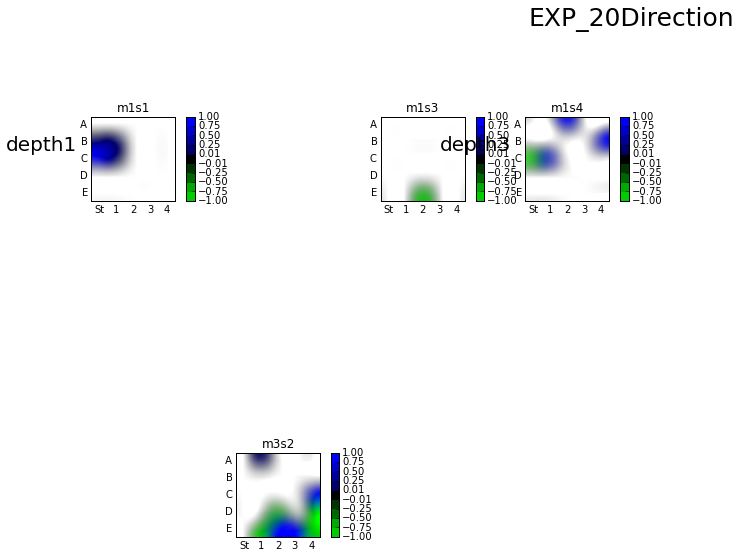

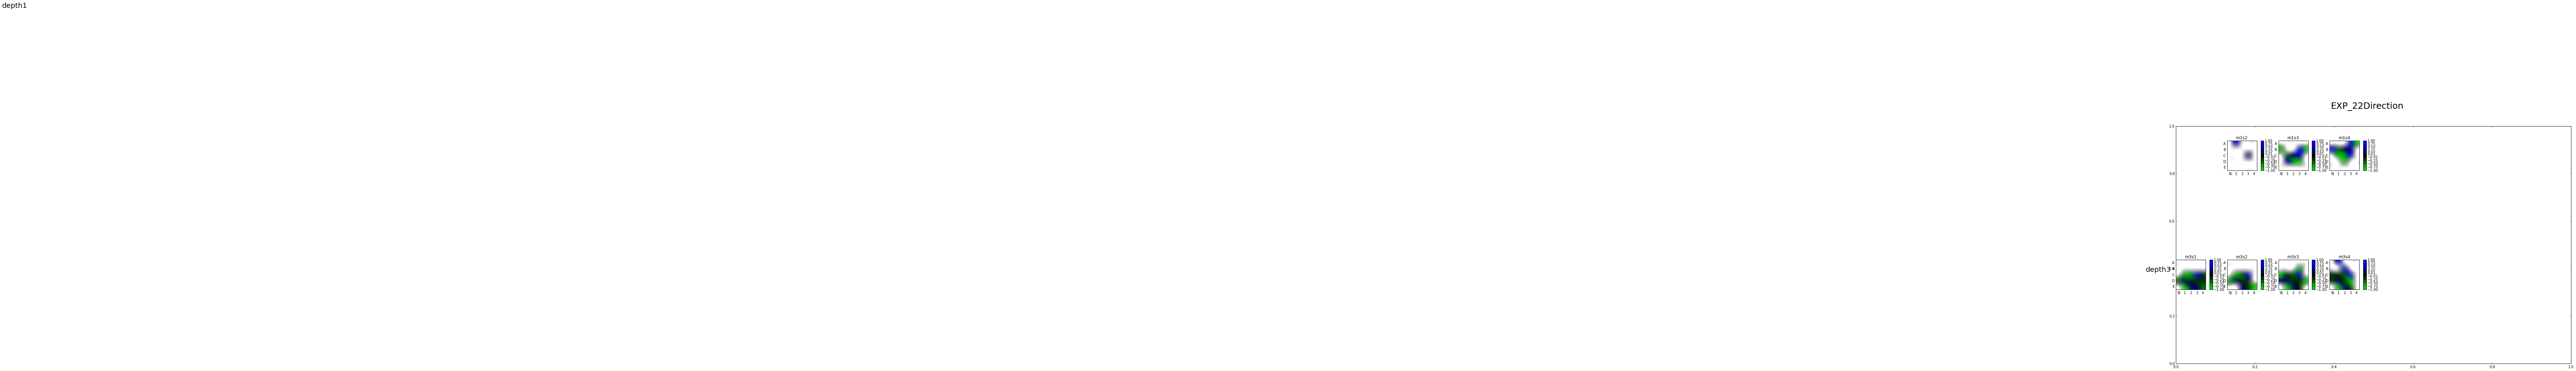

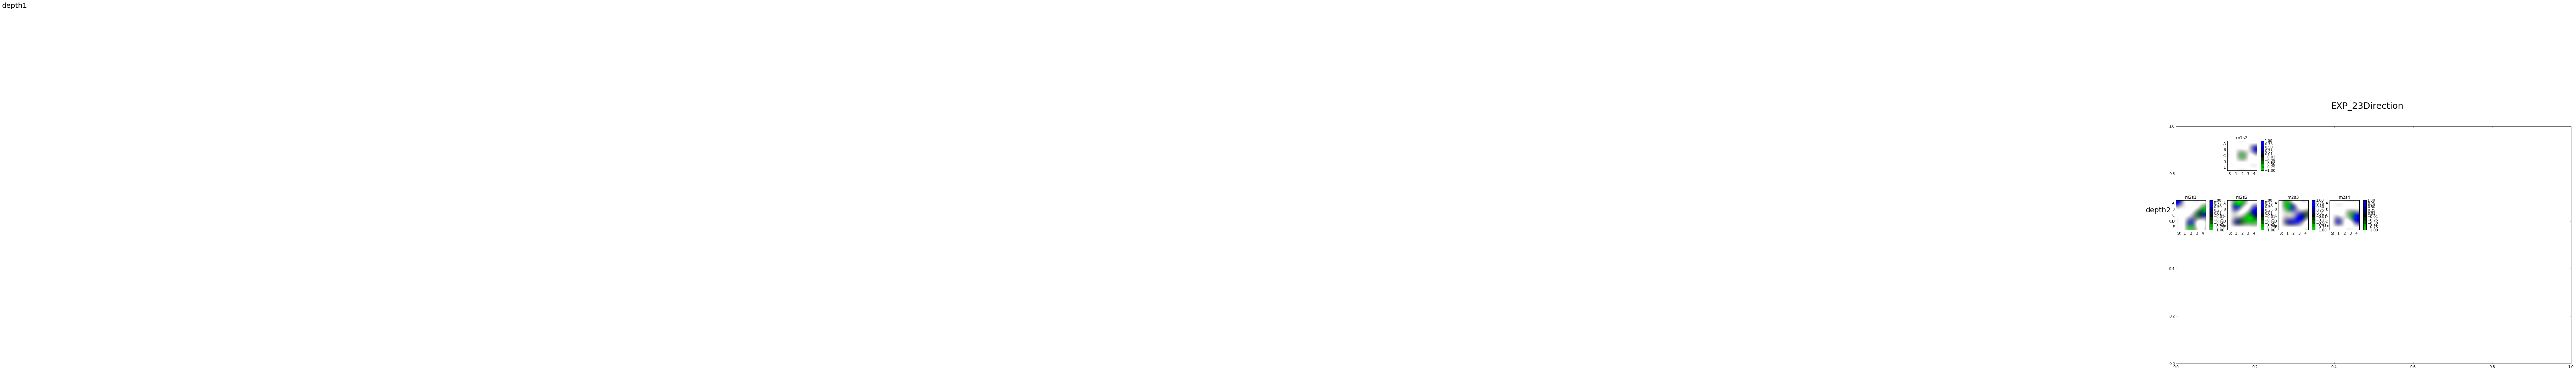

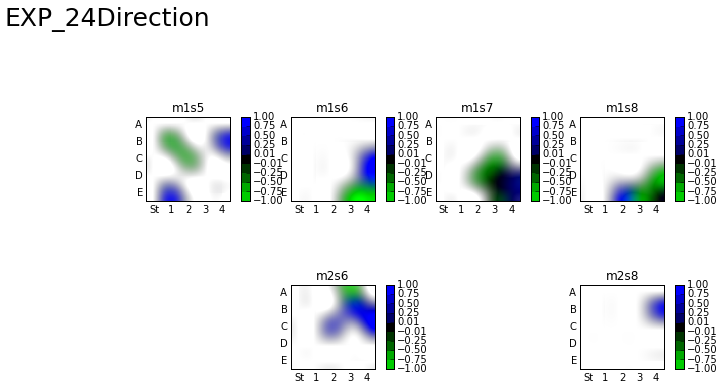

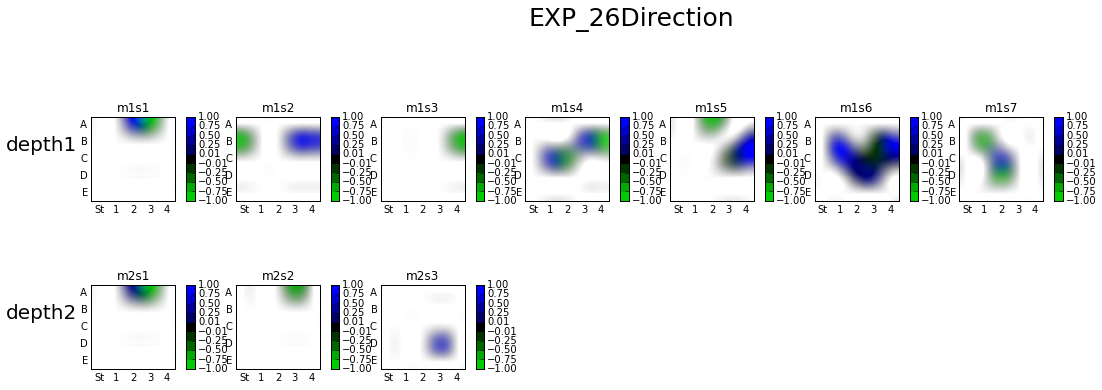

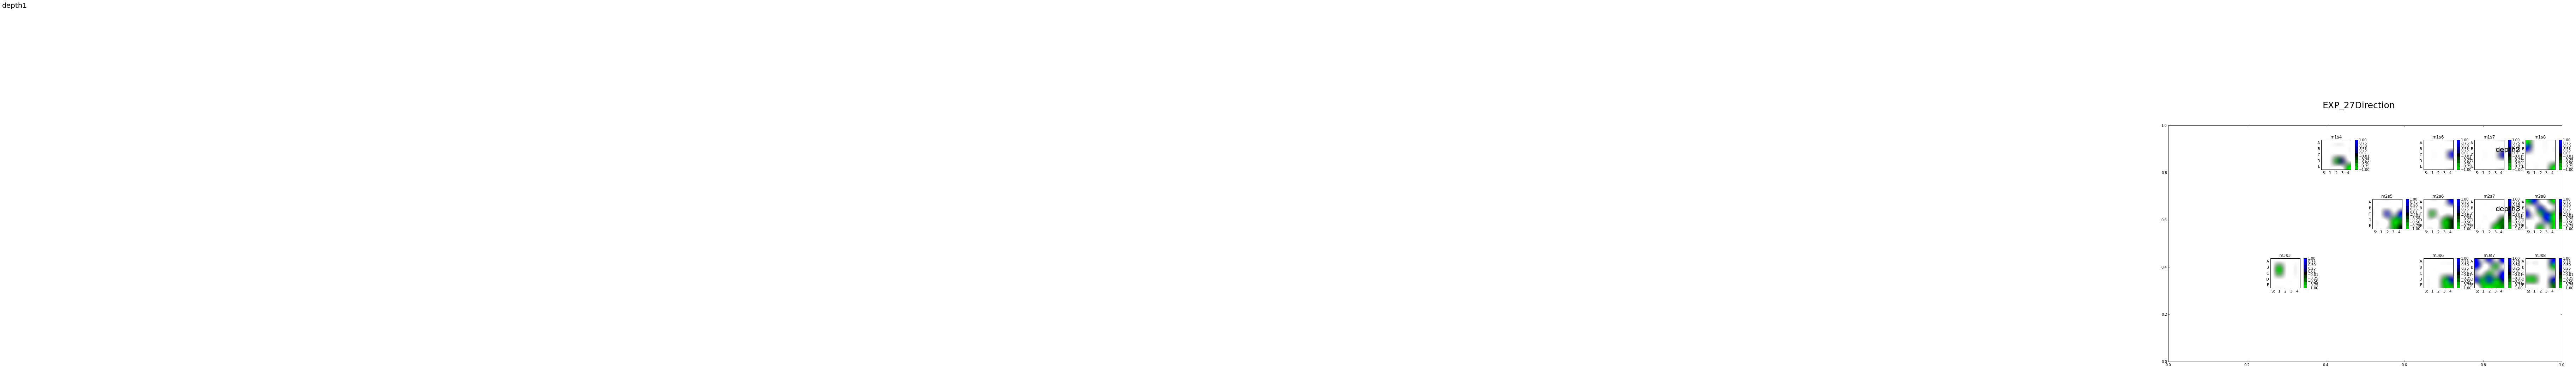

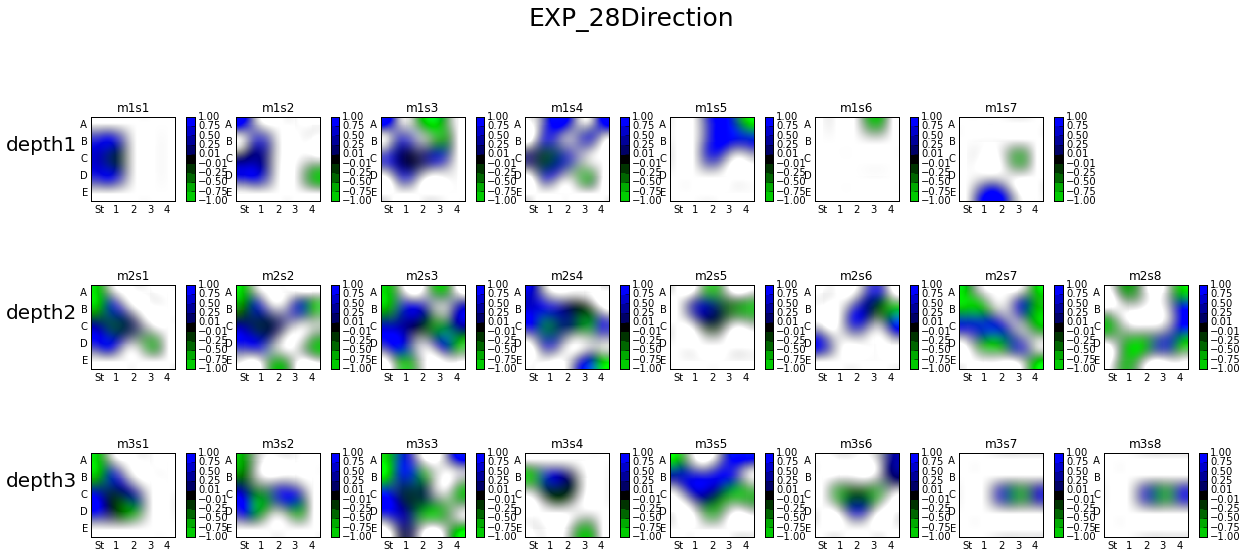

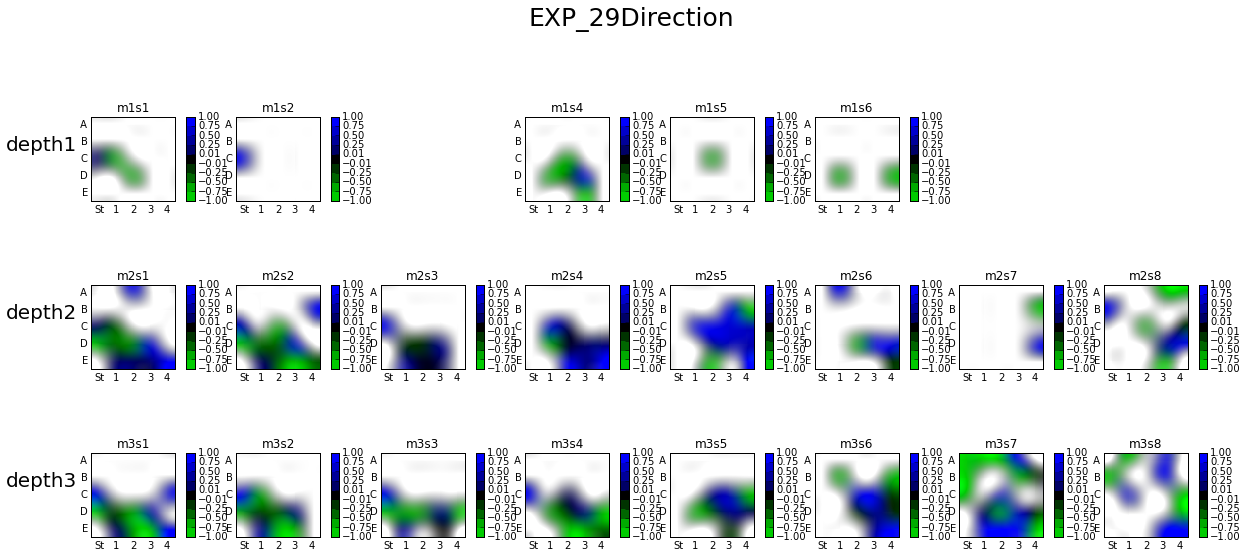

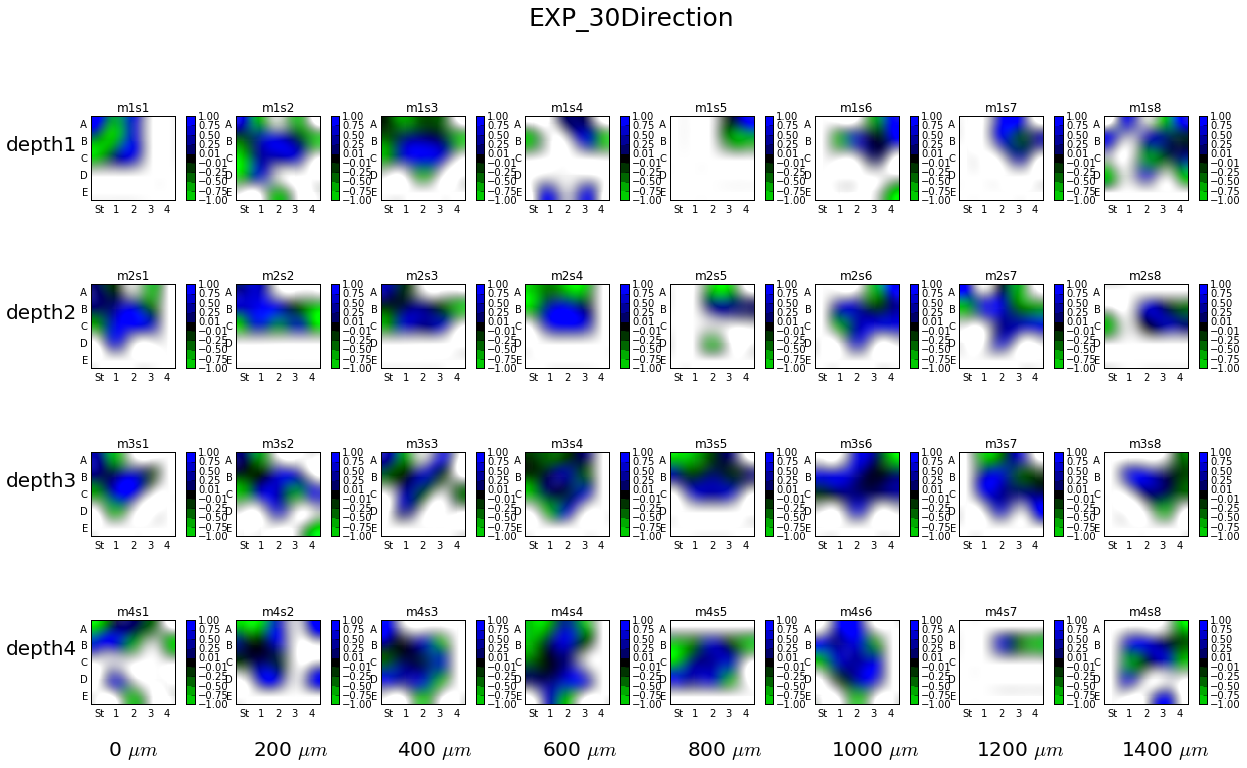

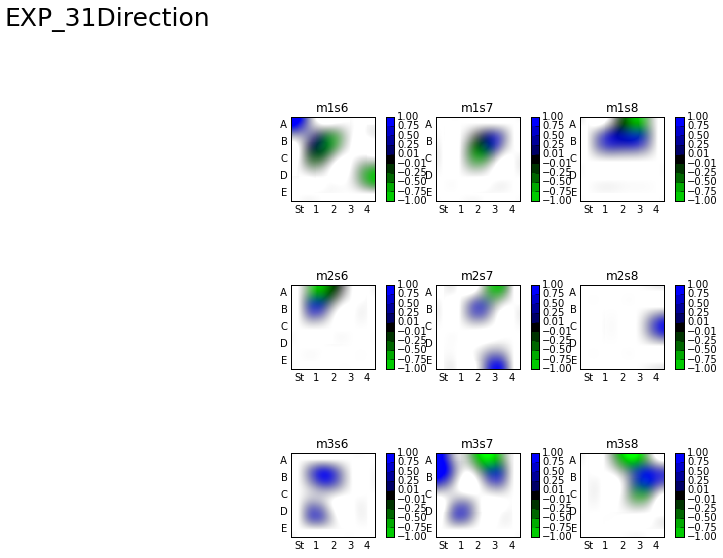

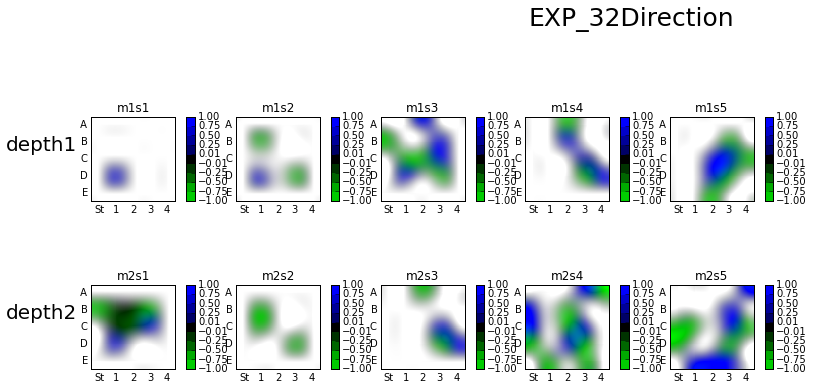

In [22]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as colors
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter


#-------------------------------
# PLOTTING SURPRISE ANALYSIS
#-------------------------------
# Loading data
Folder = '/home/matias/WORKSPACE/S2_git/data'

file =Folder +'/wavedataAll'
WAVE = load_obj(file)
PCA,cl = Get_PCA(WAVE) # to get it once only  
#-------------------------------
for expe in [20,22,23,24,26,27,28,29,30,31,32]:#[20,22,23,24,26,27]:
    fig = plt.figure(figsize=(20.0,12))
    #fig = plt.figure(figsize=(12,20))
    file =Folder +'/surprisedata' + str(expe)
    #-------------------------------
    # Loading data
    Surprise = {}
    Surprise =load_obj(file)
    wb = 20 if exp>22 else 11
    nth = 5 #this is what we used when detecting significance
    #-------------------------------
    # Data info
    idx = sort(list(Surprise.keys()))
    
    fig.suptitle('EXP_'+str(expe)+'Direction',fontsize=25)
    
    outer_grid = gridspec.GridSpec(4, 8, wspace=0.4, hspace=0.015)
    for measurement in sorted(Expe[expe]):
        #print(measurement)
        #-------------------------------
        latdataTot = {}
        wavedataTot = []
        surpdataTot = {}
        stdataTot = []
        surpdataTot2 = {}

        latlabel={}
        for n in idx[:]:
            exp = Surprise[n].exp
            meas = Surprise[n].meas
            shank = Surprise[n].shank
            # select the neurons in this shank
            ncount =0
            latdata = Surprise[n].Latency

            latdataTot[n] = latdata
            latlabel[n] = [meas,shank]
            
            surpdata = Surprise[n].surprise_data
            surpdataTot2[n] = surpdata
            if meas == int(measurement[1]) and shank == int(measurement[3]):
                
                #print(n)                                #select neuron here!
                ncount+=1
                #-------------------------------
                # Neuron data
                surpdata = Surprise[n].surprise_data
                stdata = Surprise[n].surprise_data.Sig_strength
                wavedata= WAVE[n]
                neuron = Surprise[n].clusnum
                # gather data
                #latdataTot[n] = latdata
                #stdataTot[] = np.append(stdataTot,stdata)
                surpdataTot[n] = surpdata
        
        #reshape(latdataTot,[ncount,25,2])
        #reshape(stdataTot,[ncount,25,2]
        
           
# MAPS  
        outer_grid = gridspec.GridSpec(4, 8, wspace=0.4, hspace=0.015)
        gridpos = (int(measurement[1])-1)*8+int(measurement[3])-1     
        inner_grid = gridspec.GridSpecFromSubplotSpec(1,1,subplot_spec=outer_grid[gridpos], wspace=0.1, hspace=0.1)
        #display_mapsShank(surpdataTot,latdataTot, fig, inner_grid,expe,measurement)
        display_mapsDirection(surpdataTot,latdataTot, fig, inner_grid,expe,measurement)

# LATENCY
    #outer_grid = gridspec.GridSpec(1, 1, wspace=0.5, hspace=0.5)
    #gridpos = (int(measurement[1]))+(int(measurement[3])-1)*4-1     
    #inner_grid = gridspec.GridSpecFromSubplotSpec(1,1,subplot_spec=outer_grid[0], wspace=0.1, hspace=0.1)
    #display_latenciesShank(surpdataTot2,latdataTot,latlabel, fig, inner_grid,measurement)

        
        if measurement[3]== '1':
           text(-5.5,1.5, 'depth' + measurement[1],size = 20) 
        if measurement[1]== '4' :
           text(0.5,7.5, str(200*(int(measurement[3])-1))+ " $\mu m$" ,size = 20) 
            
# WAVE
        #inner_grid = gridspec.GridSpecFromSubplotSpec(2,2,subplot_spec=outer_grid[2], wspace=0.4, hspace=0.6)
        #display_wave(wavedata, fig, inner_grid)
        #display_PCA(PCA,cl,WAVE[n].PCA_wave, fig, inner_grid)

    #-------------------------------
    #PDFfile = '/home/matias/WORKSPACE/OUTPUT/Surprise/Exp'+ str(expe) +'_'+ measurement + '_Latencies.pdf'
    PDFfile = '/home/matias/WORKSPACE/OUTPUT/Surprise/Exp'+ str(expe) +'_mapsDirection.pdf'

    fig.savefig(PDFfile , format='pdf')  

# MAIN PLOT: Single Neuron

exp30_m1s1_c17
exp30_m1s1_c18
exp30_m1s1_c2
exp30_m1s1_c21

/home/matias/miniconda/lib/python3.4/site-packages/ipykernel/__main__.py:234: RuntimeWarning: invalid value encountered in true_divide
/home/matias/miniconda/lib/python3.4/site-packages/ipykernel/__main__.py:235: RuntimeWarning: invalid value encountered in true_divide
/home/matias/miniconda/lib/python3.4/site-packages/ipykernel/__main__.py:276: RuntimeWarning: invalid value encountered in true_divide



exp30_m1s1_c23
exp30_m1s1_c24
exp30_m1s1_c25
exp30_m1s1_c27
exp30_m1s1_c3
exp30_m1s1_c30


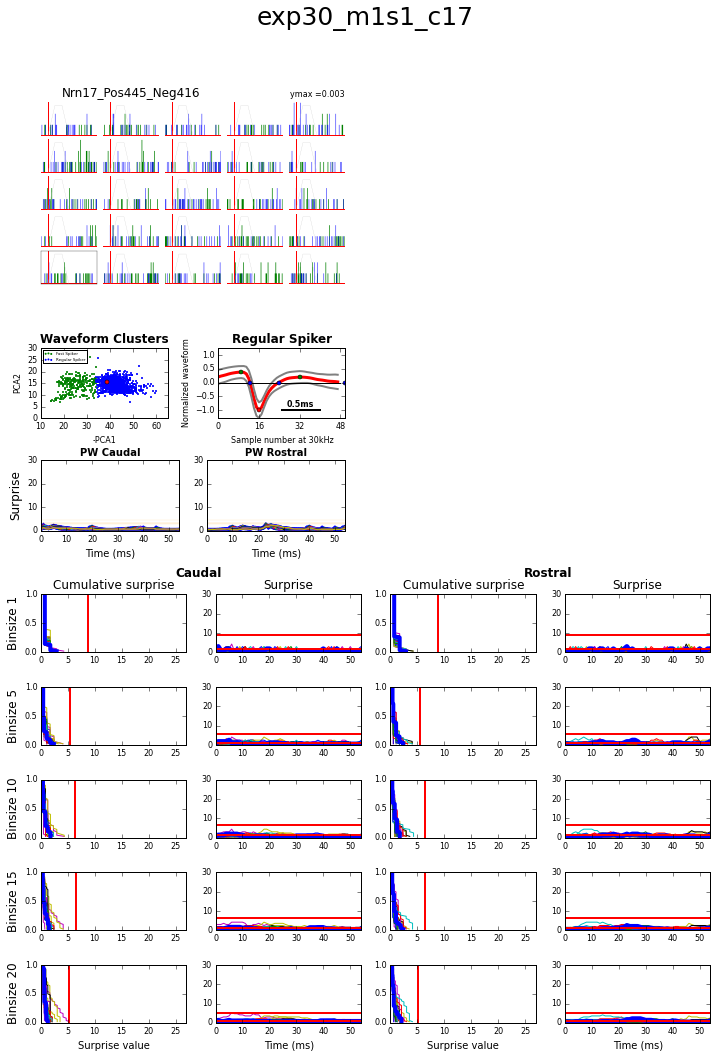

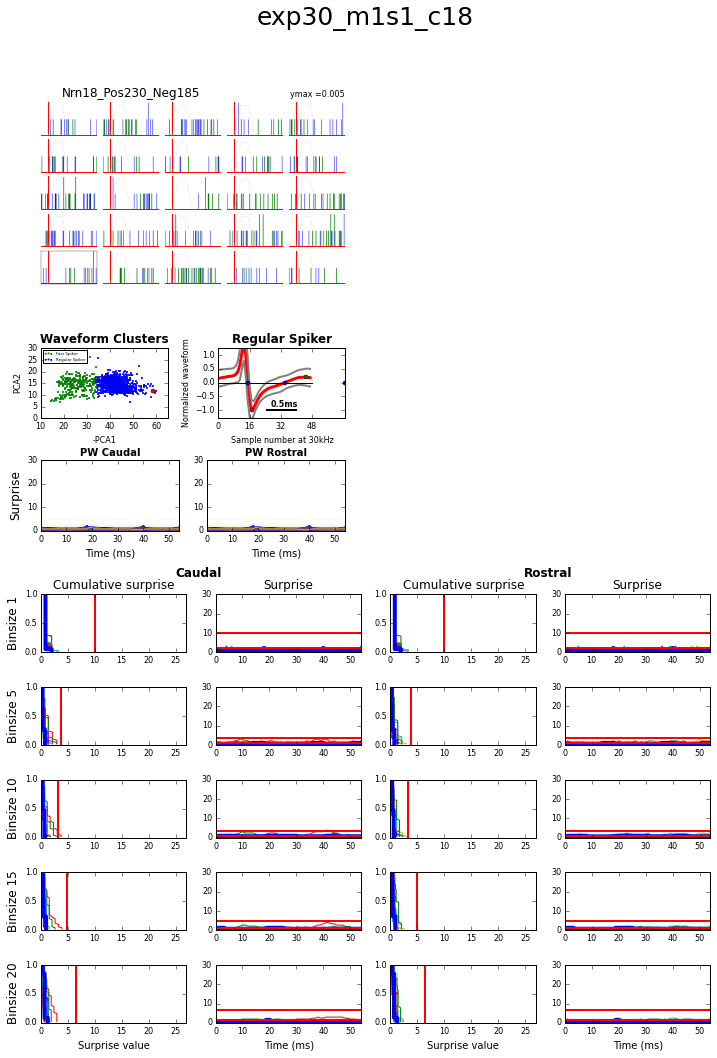

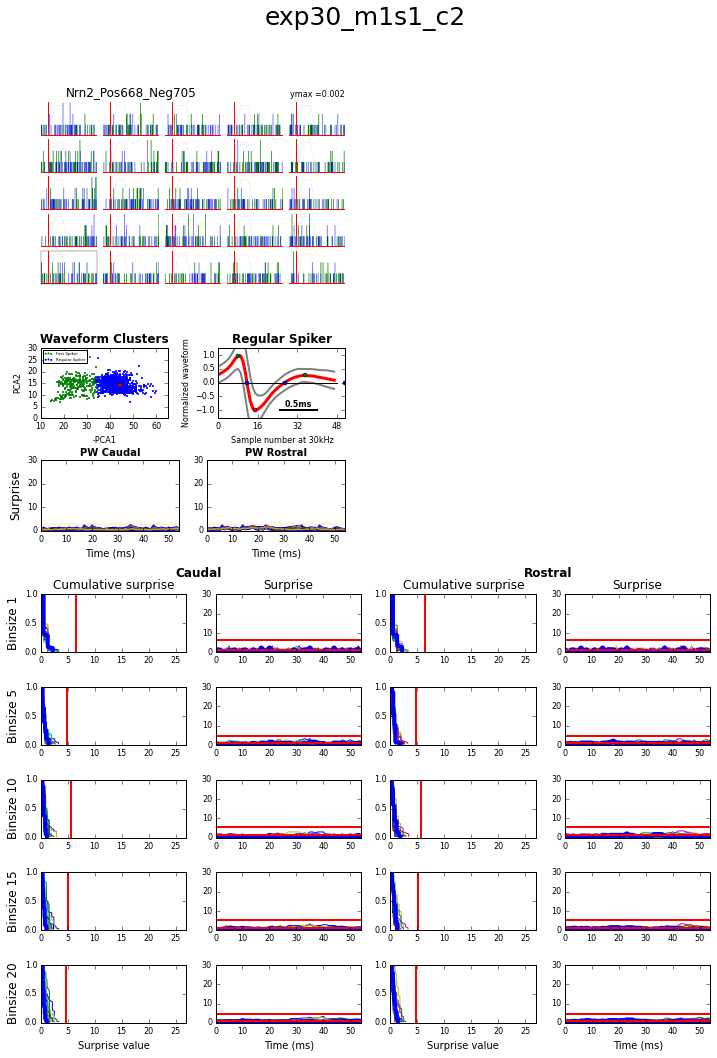

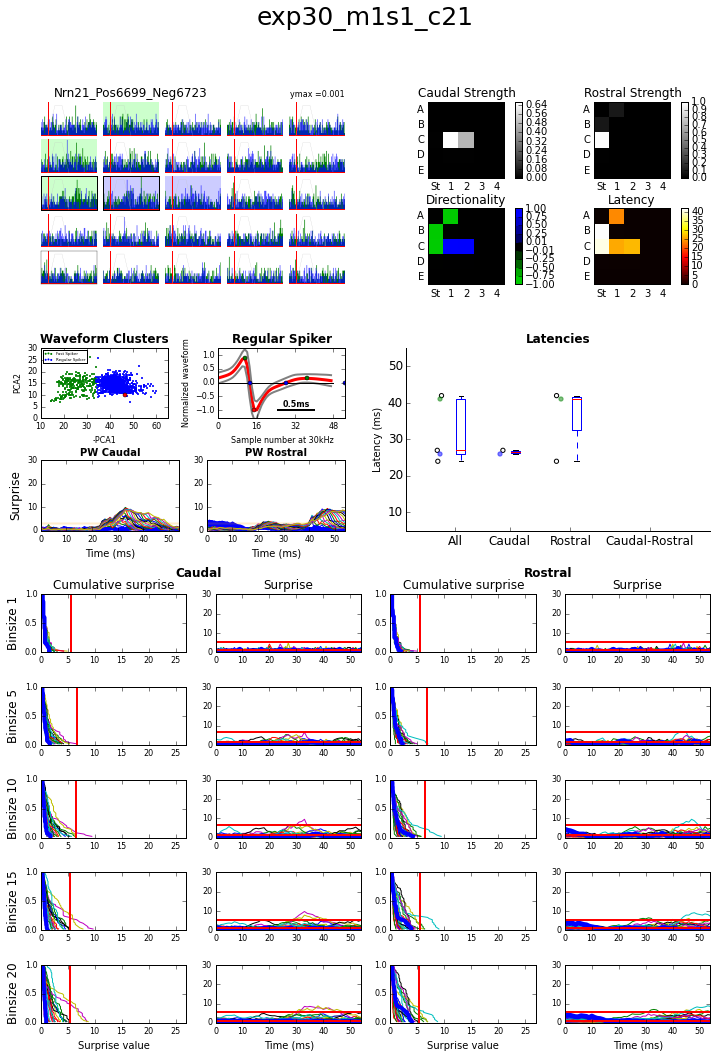

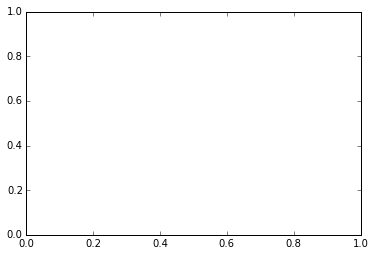

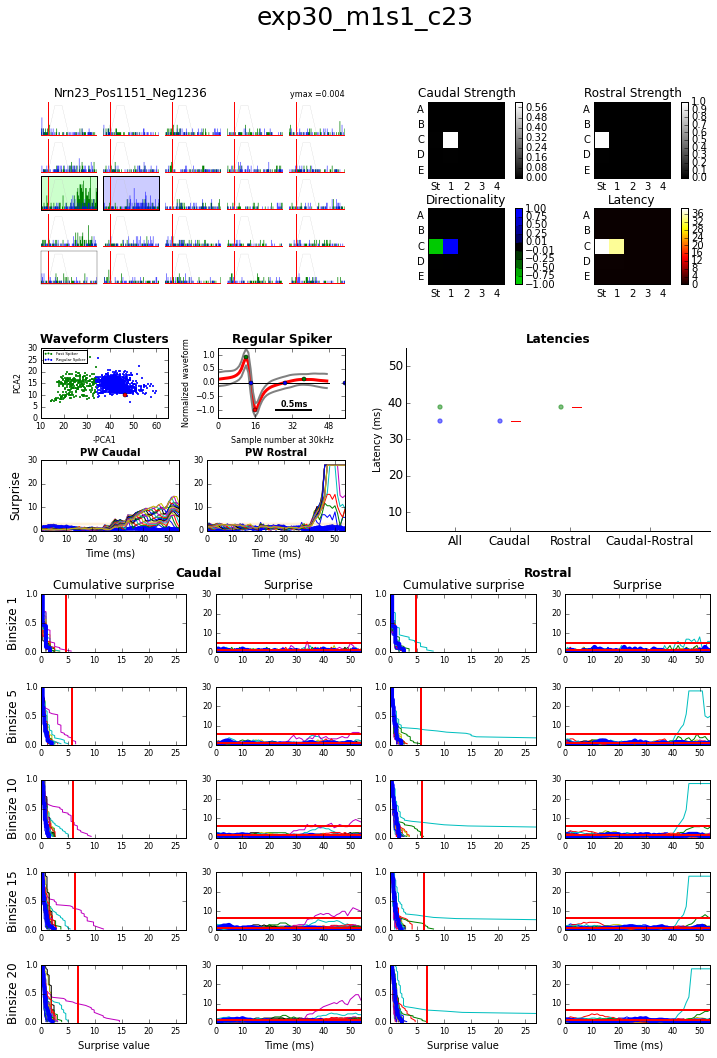

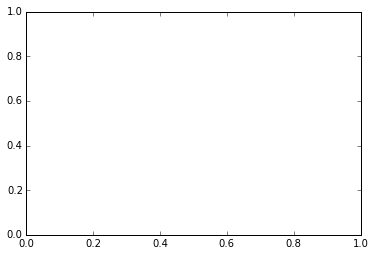

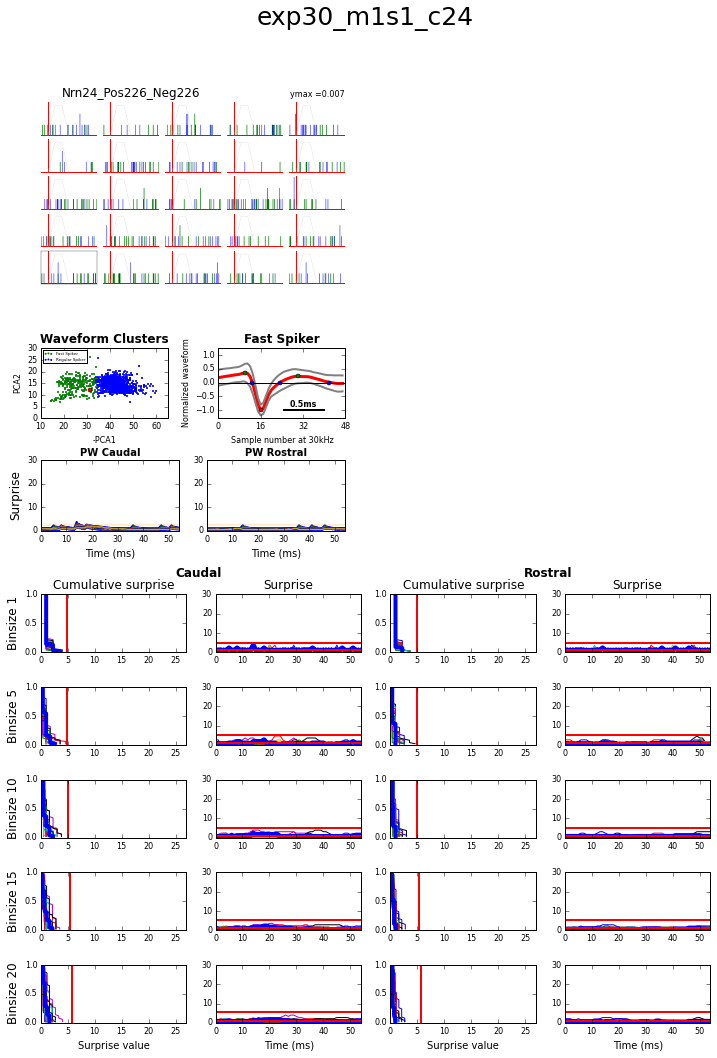

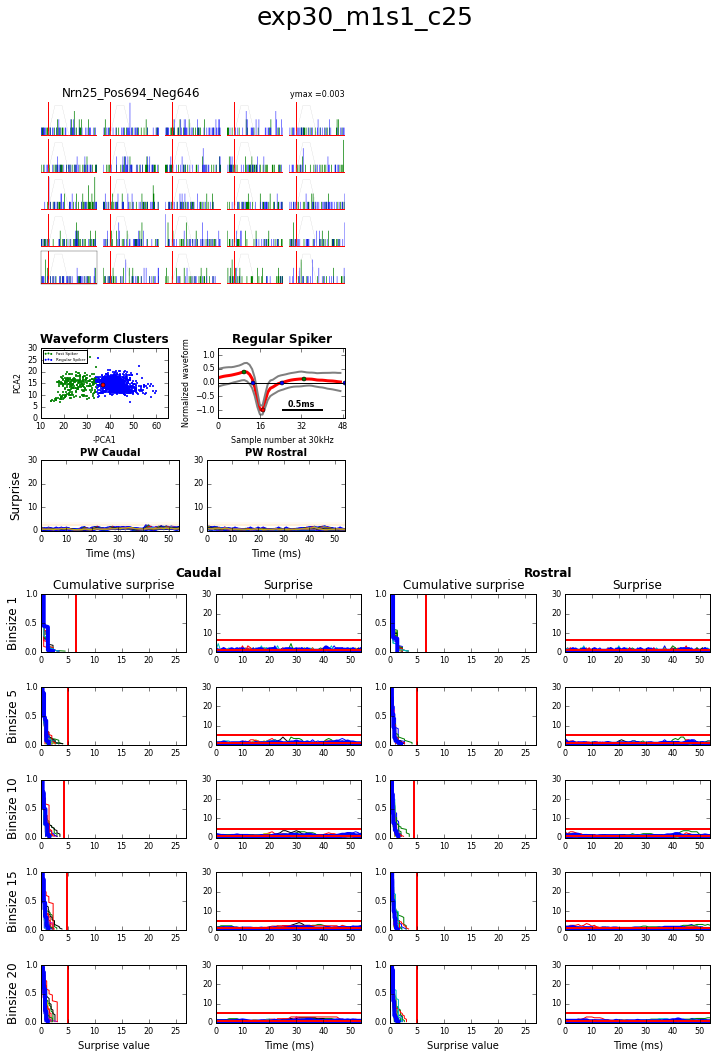

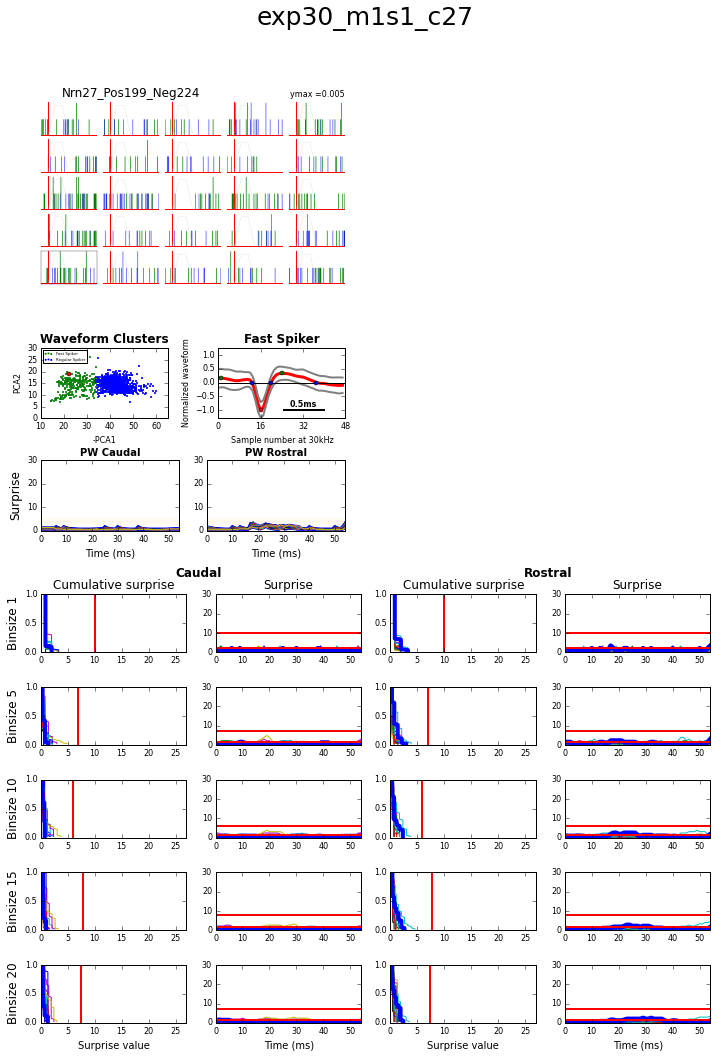

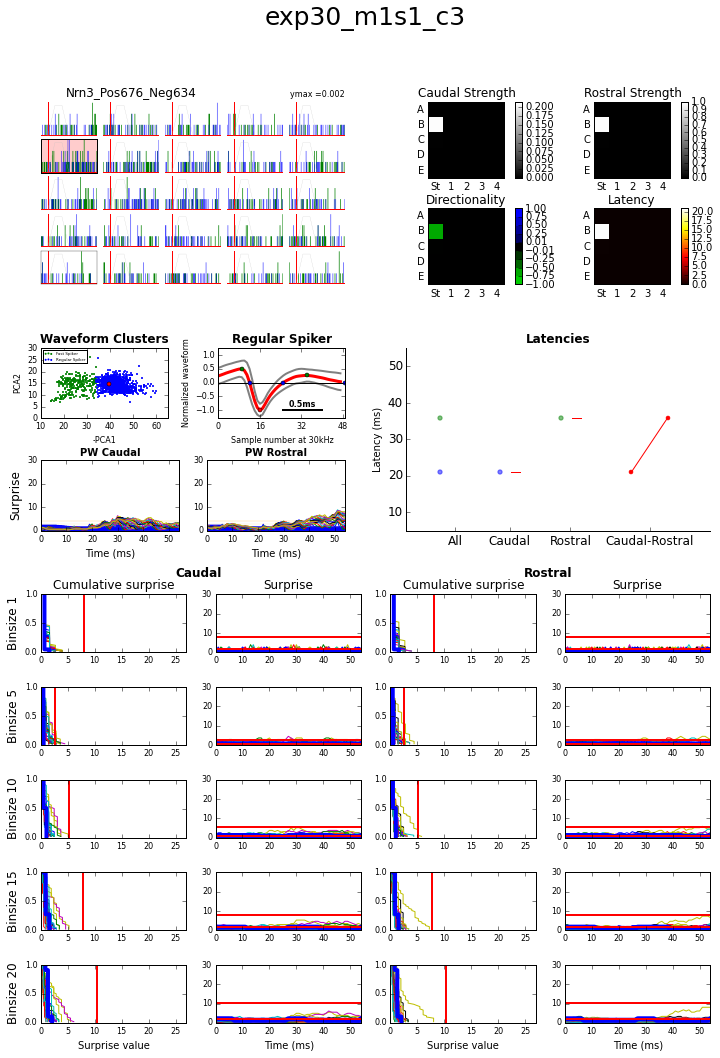

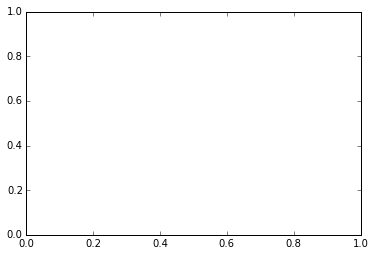

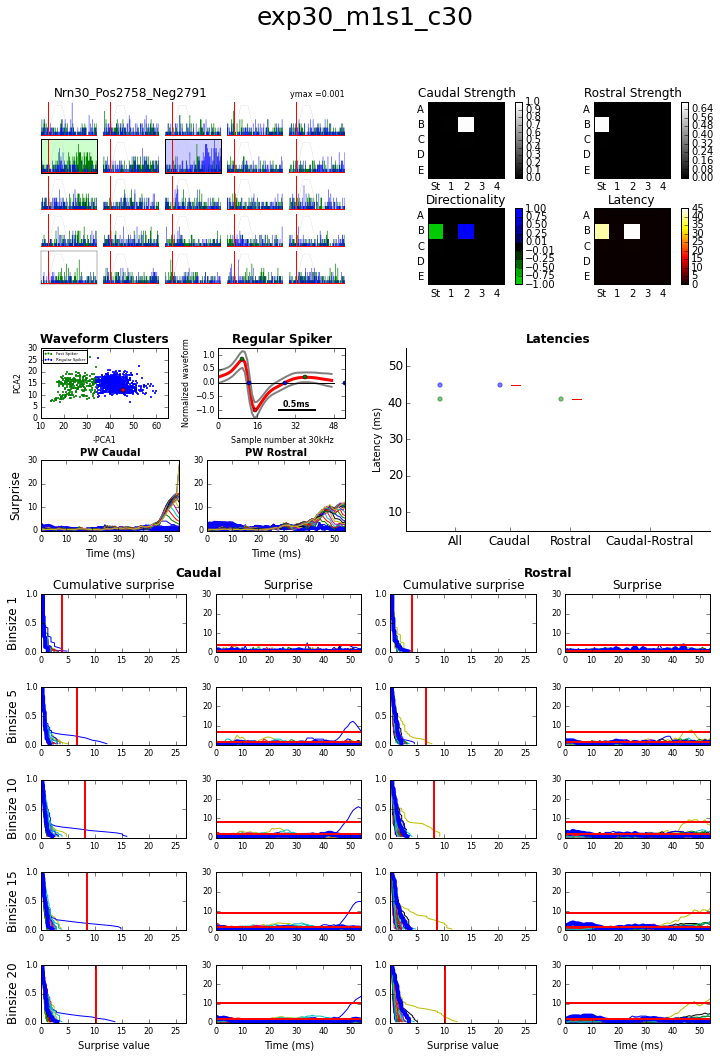

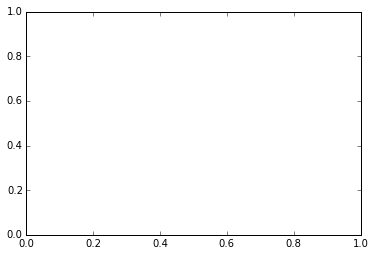

In [196]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D

#
import matplotlib.colors as colors
#-------------------------------
# PLOTTING SURPRISE ANALYSIS
#-------------------------------
# Loading data
Folder = '/home/matias/WORKSPACE/S2_git/data'

file =Folder +'/wavedataAll'
WAVE = load_obj(file)
PCA,cl = Get_PCA(WAVE) # to get it once only  
#-------------------------------
for expe in [30]:#[20,22,23,24,26,27,28,29,30,31,32]:
    file =Folder +'/surprisedata' + str(expe)
    #-------------------------------
    # Loading data
    Surprise = {}
    Surprise =load_obj(file)
    PSTH = {}
    file =Folder +'/psthdata' + str(expe)
    PSTH = load_obj(file)
    #-------------------------------
    # Data info
    idx = sort(list(Surprise.keys()))
    #nro = 14
    #n=idx[nro]
    for n in idx[0:10]:
        #n = 'exp30_m1s1_c3'                                       #select neuron here!
        print(n)
        #print(Surprise[n].keys())
        #print(Surprise[n].surprise_data.keys())
        #-------------------------------
        # Neuron data
        histdata = PSTH[n].psth_times
        surpdata = Surprise[n].surprise_data
        latdata = Surprise[n].Latency
        wavedata= WAVE[n]
        neuron = Surprise[n].clusnum
        exp = Surprise[n].exp
        meas = Surprise[n].meas
        shank = Surprise[n].shank
        #-------------------------------
        # PSTH params
        t0 = -Surprise[n].psth_edges[0]
        t_before= 10
        t_after=70
        wb = 20 if exp>22 else 11
        nth = 5 #this is what we used when detecting significance

        #-------------------------------
        #Figure
        fig = plt.figure(figsize=(12,16.5))
        fig.suptitle(n,fontsize=25)
        outer_grid = gridspec.GridSpec(4, 2, wspace=0.2, hspace=0.35)
        #-------------------------------
# PSTH
        inner_grid = gridspec.GridSpecFromSubplotSpec(5,5,subplot_spec=outer_grid[0], wspace=0.1, hspace=0.1)
        display_PSTH(expe, histdata, surpdata, t0, t_before, t_after, fig,inner_grid, n) 
# SURPRISE for different binsizes
        inner_grid = gridspec.GridSpecFromSubplotSpec(5,4,subplot_spec=outer_grid[4:8], wspace=0.2, hspace=0.6)
        display_surprise(surpdata,[1,5,10,15,20], n , fig, inner_grid, wb, nth)
# PW SURPRISE
        inner_grid = gridspec.GridSpecFromSubplotSpec(2,2,subplot_spec=outer_grid[2], wspace=0.2, hspace=0.6)
        display_surprisePW(surpdata, n , fig, inner_grid, wb, nth)
# LATENCY
        inner_grid = gridspec.GridSpecFromSubplotSpec(1,1,subplot_spec=outer_grid[3], wspace=0.2, hspace=0.4)
        display_latencies(surpdata,latdata, fig, inner_grid)
# MAPS
        inner_grid = gridspec.GridSpecFromSubplotSpec(2,2,subplot_spec=outer_grid[1], wspace=0.2, hspace=0.4)
        display_maps(surpdata,latdata, fig, inner_grid,expe)
# WAVE
        inner_grid = gridspec.GridSpecFromSubplotSpec(2,2,subplot_spec=outer_grid[2], wspace=0.4, hspace=0.6)
        display_wave(wavedata, fig, inner_grid)
        display_PCA(PCA,cl,WAVE[n].PCA_wave, fig, inner_grid) 

        #-------------------------------
        PDFfile = '/home/matias/WORKSPACE/OUTPUT/Surprise/EXP_'+str(expe)+'/'
        fig.savefig(PDFfile + n + '_surp.pdf', format='pdf')  

# PLOT ALL in same pdf

In [ ]:
expe = 30
file =Folder +'/surprisedata' + str(expe)
#Surprise =load_obj(file)

file =Folder +'/psthdata' + str(expe)
PSTH = load_obj(file)

idx = sort(list(Surprise.keys()))
nro = 17
n=idx[nro]
print(n)
print(Surprise[n].keys())
print(Surprise[n].surprise_data.keys())
real = Surprise[n].surprise_data.Sig
real2 = Surprise[n].surprise_data.Sig_top
#for w in arange(25):
#    print(w,':',real[w],'   top',':',real2[w])
PW = Surprise[n].surprise_data.PW
Sigsi = Surprise[n].surprise_data.Sig_sizes
Sigst = Surprise[n].surprise_data.Sig_strength_norm
Latency = Surprise[n].Latency
#print(Sigst.reshape([5,5,2]))
#print(Latency.reshape([5,5,2]))
print(Surprise[n].blank_rate)
#print(PW)
#for i in arange(20)+1:
#    print(Surprise[n].surprise_data.Thresh_std[i])
#plot(Surprise[n].psth_bins[17][0])
#plot(Surprise[n].psth_bins[11][1])
#Surprise[n].psth_bins[10]
#----------------------------------------------------------------
histdata = PSTH[n].psth_times
surpdata = Surprise[n].surprise_data
neuron = Surprise[n].clusnum

fig = plt.figure(figsize=(12,16.5))

#idxstart = 0
#idxend = 0
exp = Surprise[n].exp
meas = Surprise[n].meas
shank = Surprise[n].shank
#from n in idx[idxend:]:
#    if nrns <16: 
#        layout = [5,3]
#    else: layout = [nrns//3+(nrns%3!=0),3]
#    outer_grid = gridspec.GridSpec(layout[0], layout[1], wspace=0.1, hspace=0.2)
outer_grid = gridspec.GridSpec(5, 3, wspace=0.1, hspace=0.2)
inner_grid = gridspec.GridSpecFromSubplotSpec(5,5,subplot_spec=outer_grid[0], wspace=0.1, hspace=0.1)

t0 = -Surprise[n].psth_edges[0]
t_before= 10
t_after=70

display_PSTH(expe, histdata, surpdata, t0, t_before, t_after, fig,inner_grid, n) 

PDFS = '/home/matias/WORKSPACE/OUTPUT/Surprise/'
fig.savefig(PDFS + n + '_hist.pdf', format='pdf')


# FUNCTIONS TO BUILD SURPRISE

In [317]:
#---------------------------------------------------------------------------------------
# BUILD PSTH   (blank correction, if less or equal than 2 counts we add 1 spike)
#---------------------------------------------------------------------------------------
# In this functions we get the psth bin spike counts for the given times in 1ms bins
# Bin borders are integer times, e.g. bin 0-1 has spikes >0ms and <1ms
def BuildPsth(timedata,t_before,t_after,histlength):
    
    psths = np.zeros([25,2,histlength-1])
    bins1w = np.zeros(2)
    
    # we multiply by 1000 to get results in msec
    for w in arange(25):
        bins1wup, bins = np.histogram(timedata[w][0]*1000, bins = np.linspace(-t_before, t_after, histlength))
        bins1wdn, bins = np.histogram(timedata[w][1]*1000, bins = np.linspace(-t_before, t_after, histlength))
        
        psths[w] = [bins1wup,bins1wdn] 
        
    return psths

#---------------------------------------------------------------------------------------
# GET THRESHOLD FROM BLANK  (getting threshold at 15% of joint blanks, i.e. at the 15 value of the cumulative distribution)
#---------------------------------------------------------------------------------------
# Get the maximum Surprise value of the blank whisker and its standard deviation
def GetT(SurpriseB,surpmin): #binsize x direction x then list of values: 20x2x55 (55ms window from bin 0-1 ms)
    thresh = {}
    #thstd = {}
    for binsize in arange(len(SurpriseB))+1:
        #all_surp = np.append(SurpriseB[binsize][0][surpmin:],SurpriseB[binsize][1][surpmin:])
        all_surp = np.append(SurpriseB[binsize][0][0:1000],SurpriseB[binsize][1][0:1000])
        thresh[binsize] = [sorted(all_surp)[-15],sorted(all_surp)[-15]]  # here we get the 15th from top values
        #thstd[binsize] = [std(SurpriseB[binsize][0]),std(SurpriseB[binsize][1])]  
    return thresh #, thstd

#---------------------------------------------------------------------------------------
# BUILD Single SURPRISE        (correcting not to get inf logarithm with an epsilon approx 10^-27)
#---------------------------------------------------------------------------------------
# Here we build the surprise for a single binsize and a single whisker, for the two directions
# its a direction x size: 2 x 55 
def BuildSingleSurprise(psth, rate0, binsize, surplength,t_before):
    eps=numpy.finfo(float128).eps/1000000000   #this epsilon is used not to get inf when taking log10
    mu = rate0*binsize       # this is the mean value for the poisson blank, and corresponding binsize
    counts = np.zeros([2,surplength])
    Surprise = np.zeros([2,surplength])
    
    if rate0 ==0: mu = 0.01 
        
    for j in arange(surplength):  
        i = j + t_before - binsize + 1  #this will make every surprise start at 0-1 ms bin
        for d in [0,1]:
            counts[d][j] = sum(psth[d][i:i+binsize])
            Surprise[d][j] = -log10(min(poisson.cdf(counts[d][j],mu)-eps,1-poisson.cdf(counts[d][j],mu)+eps)) 
    
    return Surprise
      
#---------------------------------------------------------------------------------------
# BUILD SURPRISE
#---------------------------------------------------------------------------------------
# Here we build all the surprises for each whisker and each binsize.
# Also we build the blank whisker and threshold values and the descriptive structure
# We compute significant whisker, values, PW and latencies
def BuildSurprise(hist_times,t_before,base_rate,maxbin,surpmax,blankw):
        
    # hist_times:         the array of spiketimes for each whisker and direction relative to stim
    # t_before & t_after: how long we want to compute the psths bins (all 1 msec)
    # base_rate:          rate of a 1ms bin of the blank psth
    # maxbin:             the number of binning sizes where we compute the surprise, from 1 to maxbin
    # blankw:             the blank whisker number (changes depending on the experiment)
    # surpmax:            up to what time we compute surprise (tipically 55ms)
    # nth:                number of times we multiply the threshold to get a significant surprise 
    # nsizeth:            how many consecutive bins are required to be responsive (tipically 2)
    # surpmin:            is from the time we consider to look for a response (tipically over 5ms)
    # nbinsabove:            number of different binnings required to be significant for the whisker to be (tipically 2)
    
    # we save all in this variable as attr dictionary
    Surprise = dict()
 
    #-------------------------------------
    # here computing the surprise (from surpmin to surpmax in ms)
    SurpriseW = {}
   
    for w in arange(25):
        Surprisefixbin = {}  #here we store the 25 whiskers
        
        for binsize in arange(maxbin)+1:
            Surprisefixbin[binsize] = BuildSingleSurprise(hist_times[w],base_rate,binsize,surpmax,t_before)
        
        SurpriseW[w] = Surprisefixbin
        if w == blankw:  # getting the threshold of surprise from the blank whisker
            thresh = GetT(SurpriseW[w],surpmin)
            
    Surprise = AttrDict({'Data' : SurpriseW, 'Thresh': thresh })#,'Thresh_std': thstd})
    Surprise.update({'logic_tree_data': '[whiskers][binsizes][direction][values] = 25x20x2x'+ str(surpmax-surpmin)})
    Surprise.update({'logic_tree_thresh': '[binsizes][direction] = 20x2'})

    return Surprise    

#------------------------------------
# BUILD SIGNIFICANCE
#-------------------------------------
def BuildSig(SurpriseData, thresh,blankw,surpmax,nth,nconsecabove,surpmin,nbinsabove):
    
    Detection = AttrDict({})
        
    Sig, SigSizesList , SigTop, PW , PWstrong, SigStrength, SigStrengthNorm= IsSig(SurpriseData,thresh,nth,nconsecabove,surpmin,nbinsabove,blankw)
    
    Detection.update({'Sig':Sig,'Sig_sizes':SigSizesList,'Sig_top':SigTop,'PW':PW , 'PWstrong': PWstrong})        
    Detection.update({'Sig_strength': SigStrength, 'Sig_strength_norm': SigStrengthNorm})       
    
    Detection.update({'logic_tree_significants': '[whiskers][direction] = 25x2'})
    Detection.update({'logic_tree_sig_sizes': '[whiskers][binsizes][direction] = 25x20x2'})
    
    #-------------------------------------
    
    return Detection

#---------------------------------------------------------------------------------------
# IS SIGNIFICANT?      (responses below 5% strength not considered) 
#---------------------------------------------------------------------------------------
# getting a list of Significant whiskers x directions: 25x2 
# and the list of binsizes significant values 25x20x2
# PW values,  Strengths, and Top whiskers values
def IsSig(Surp,th,nth,nconsecabove,surpmin,nbinsabove,wb):
    # Surp:    the array of surprise values for each whisker binsize and direction
    # th:      threshold (tipically the maximum surprise of the blank)
    # nth:     number of times we multiply th to get a significant surprise 
    # nconsecabove: how many consecutive bins are required to be responsive (tipically 2)
    # surpmin:  is from the time we consider to look for a response (tipically over 5ms)
    # nbinsabove:   number of different binnings required to be significant for the whisker to be (tipically 2)
        
    Sig = zeros([25,2])
    Sigsizes = zeros([25,20,2])
    SigTop = zeros([25,2])
    nhightot = zeros([25,2])
    SigStrength = zeros([25,2])
    SigStrengthNorm = zeros([25,2])
    
    for w in arange(25):
        #-------------------------------------
        #computing significance for every binsize and direction for a single whisker
        consec = zeros([20,2])     # this is for computing how many surprise values above threshold are consecutive
        two_consec = zeros([20,2]) # to compute if we consider it significant for each binsize and direction
        for binsize in arange(20)+1:
            for d in [0,1]:
                overthresh =  where(nth*th[binsize][d]< Surp[w][binsize][d][surpmin:])[0]
                consecutive = overthresh[1:]-overthresh[:-1]
                consec[binsize-1][d] = len(where(consecutive==1)[0])
                two_consec[binsize-1][d] = 1 if consec[binsize-1][d] >=nconsecabove else 0
                       
        # here we save the significant whiskers for every binsize and direction
        Sigsizes[w] = two_consec
        # Here we say if the whisker is significative for the both directions
        Sig[w] = [1 if sum(two_consec[:,0])>=nbinsabove else 0,1 if sum(two_consec[:,1])>=nbinsabove else 0]  
        
        #-------------------------------------
        # here we compute the strength as the product of tot_binsizes_sig x tot_surprisebins_sig
        if Sig[w][0]==1:
            nhightot[w][0] = sum(two_consec[:,0])*sum(consec[:,0]*two_consec[:,0])
        if Sig[w][1]==1:
            nhightot[w][1] = sum(two_consec[:,1])*sum(consec[:,1]*two_consec[:,1])
    
    #-------------------------------------
    # here we classify whiskers responding in top=1 as above 50% of maximum for each direction
    # and =2 of below 20% strength of response in that direction
    m0 = max(nhightot[:,0])
    m1=  max(nhightot[:,1])
    for w in arange(25):
        # classification for high responses
        SigTop[w] = [1 if nhightot[w][0] > m0/2 else 0,1 if nhightot[w][1] > m1/2 else 0]
        # classification for low responses
        if nhightot[w,0] < m0*0.2: SigTop[w][0] = 2
        if nhightot[w,1] < m1*0.2: SigTop[w][1] = 2
            
        SigStrength[w] = [nhightot[w,0],nhightot[w,1]]
        
    # normalize each direction
    if m0+m1>0: SigStrengthNorm = SigStrength/np.array(SigStrength).max()
    #-------------------------------------
    # PW is the max of all, PWstrong is direction maximum 0 or 1
    PW = [where(m0==nhightot[:,0])[0][0],where(m1==nhightot[:,1])[0][0]]
    # Selecting PW as blank whisker
    if m0==0: 
        PW[0]=wb
    if m1==0: 
        PW[1]=wb
    PWstrong = 0 if m0>m1 else 1
    #-------------------------------------
    # False detected if below 5%
    for w in arange(25):
        for d in [0,1]:
            if SigStrength[w][d] < max(SigStrength[:,d])/20 :
                SigStrength[w][d] = 0
                #SigStrengthNorm[w][d] = 0  # we don't erase this values in case we want to see later
                SigTop[w][d] = 0
                Sig[w][d] = 0
              
    return Sig, Sigsizes, SigTop, PW, PWstrong, SigStrength, SigStrengthNorm
        
#---------------------------------------------------------------------------------------
# GET LATENCY FOR SIGNIFICANT   (we check max, thresh, and 50% thresh, they have to come in order within 5msec)
#                               (also before the 50% response, surprise has to go half its value: near chance)
#---------------------------------------------------------------------------------------
def GetLatency(Surprise, length, maxbin, surpmin, nth, blank_rate):

    # Surprise: surprise info values   
    # length: the maximum bin to compute surprise
    # maxbin: number of different binsizes the surprise was computed
    # surpmin: minimum latency in ms, from where we compute
    # nth: the factor multiplying the threshold of the significant whiskers over the blank surprise
                    
    data = Surprise.Data
    siglist = Surprise.Sig_sizes
    sig = Surprise.Sig
    th = Surprise.Thresh
    
    Latency = zeros([25,2])
    
    for w in arange(25):
        for d in [0,1]:
            if sig[w][d] == 1: # if whisker and direction is significant, then compute latency
                minbinglobal = 100
                for binsize in arange(maxbin)+1: # for each binsize we compute the minimum latency
                    minbin = 100
                    minbin50 = 100
                    # compute the first maximum surprise
                    maxsurpbin = where( data[w][binsize][d]==max(data[w][binsize][d]) )[0][0]
                    for b in arange(surpmin-1,length)[::-1]:  #we decrease -1 for the way arange creates arrays
                                                              # and search backwards to get minbin first than minbin50  
                        #correct for saturating threshold, max is 27
                        if th[binsize][d]*nth>27:
                            th[binsize][d]=27/nth
                        #compute the big threshold surprise, while it is at least preceding the max by 5ms
                        if data[w][binsize][d][b]-th[binsize][d]*nth>0 and b<minbin and maxsurpbin-b<5 and maxsurpbin-b>=0:
                            minbin=b
                        #compute the small threshold surprise, , while it is at least preceding the bigthsurp by 5ms
                        if data[w][binsize][d][b]-th[binsize][d]*nth*0.5>0 and b<minbin50 and minbin-b<5 and minbin-b>=0:
                            minbin50=b
                    # if small threshold surprise does not preceed big threshold, we keep big threshold
                    if minbin-minbin50 > 5:
                        minbin50 = minbin
                    # if before the bin selected it does not return to slightly below chance level, keep the big
                    if min(data[w][binsize][d][0:minbin50])>th[binsize][d]:
                        minbin50=minbin
                    
                    # Here we compare with global min    
                    if minbin50<minbinglobal: 
                        minbinglobal=minbin50
                #print(minbinglobal)
                Latency[w][d] = minbinglobal+1  # we add 1 to be like Le Cam paper criteria
    
    return Latency  # we return the value of the left border of the last included bin in the sliding window  



# Define and load data files from experiments

In [9]:
global binname, textname
#---------------------------------------------------------------------------------------
SelExp = [20,22,23,24,26,27,28,29,30,31,32] #Expe                           #select experiment numbers!
grupete = [2]

#Measurements = []
dirs =[]
Folder = '/home/matias/WORKSPACE/S2_git/data'    

#Surprise = {}
#--------------------------------------------------------------------------------
# Loop Experiments
#--------------------------------------------------------------------------------
for expe in SelExp:
    
    hist_times = {}
    Surprise = {}
    #--------------------
    # To buiild psthbins
    #psthdata = dict()
    #datapsth = Folder +'/psthdata' + str(expe)
    #psthdata = load_obj(datapsth)
    #--------------------
    # To build Surprise
    psthbinsdata = dict()
    datapsthbins = Folder +'/psthbinsdata' + str(expe)
    psthdata = load_obj(datapsthbins)
    #--------------------
        
    # To build latencies if surprise already calculated
    datasurp = Folder +'/surprisedata'+str(expe)
    #Surprise = load_obj(datasurp)
    #-------------------- 
    Measurements = sorted(Expe[expe])                         #uncommento to select all
    print(expe)
      
    dirs  = [rootF + 'OUTPUT/PDFall2/EXP_'+str(expe)]
    dire = dirs[0] +'/'

    #--------------------------------------------------------------------------------
    #loop measurements and shanks
    #--------------------------------------------------------------------------------
    measurements = Expe[expe]                            

    idx = sorted(list(psthdata.keys()))
    for meas in Measurements:           
        print(meas)
        titles = 'Exp'+ str(expe) + '_Meas_' + meas[1] + '_Shank_' + meas[3]

        #Build PSTH bins (decide how long before and after stim we analyze, in ms)
        t_before = 20
        t_after = 70
        histlength = t_before + t_after + 1

        #--------------------------------------------------------------------------------
        # loop neurons of this measurement and shank 
        #--------------------------------------------------------------------------------
        for n in idx[:]:
            
            if int(meas[1]) == psthdata[n].meas and int(meas[3])==psthdata[n].shank:
                print('   neuron: ' , n)
                clus = psthdata[n].clusnum
                #hist_times = psthdata[n].psth_times
                  
                #-------------------------------------------------------
                # we give the whisker number blank stimulus
                wblank = 20   
                if expe <= 22:     #Only for EXP 22 or less: odd ELPHY piezo assignement
                    wblank = 11
                #-------------------------------------------------------    
                #-------------------------------------------------------
                # this part is only used when constructing psthbins
                #select blank stimulus times
                #blanktimes = np.append(hist_times[wblank][0],hist_times[wblank][1])
                #this base rate is not in Hz, is for a bin of 1 ms for this blank stimulus
                #base_rate = len(where(np.r_[blanktimes<=0.05] & np.r_[blanktimes>=0])[0])/100
                #print('  blank rate:',  base_rate)
                    
                #-------------------------------------------------------                
                # we build the psth_bins in 1 ms accuracy, bin borders are integer numbers
                #Surprise[n] =(AttrDict({'blank_rate': base_rate , 'psth_edges' : [-t_before,t_after] }))
                #psth_bins = BuildPsth(hist_times,t_before,t_after,histlength)
                
                #Surprise[n].update({'blank_rate' : base_rate})
                #Surprise[n].update({'psth_data' : psth_bins})
                #-------------------------------------------------------    
                #-------------------------------------------------------
                Surprise[n] = AttrDict({})
                Surprise[n].update({'clusnum': clus,'exp' : int(expe) , 'meas': int(meas[1]) , 'shank': int(meas[3])})
                                
               
                #-------------------------------------------------------
                # we build the 20 surprises for each of the 25 whiskers and two directions (20x25x2 = 10000)
                maxbin = 20   # the maximum bin to compute surprise
                surpmin = 5       #minimum latency in ms, so significance is computed from here
                surpmax = 55  # the max time for computing surprise, starting from bin with borders (0-1)
                
                #Surprise[n].update({'surprise_data'  : BuildSurprise(Surprise[n].psth_bins,t_before,t_after,base_rate,maxbin,wblank,surpmax,nthresh,nconsecabove,surpmin,nbinsaboveth)})
                #Surprise[n].update({'surprise_data' : BuildSurprise(Surprise[n].psth_bins,t_before,base_rate,maxbin,surpmax,wblank)})
                
                #----------------------------------------------------
                # we detect significant whiskers
                nth = 5              # to compute the threshold of the significant whiskers over the blank surprise
                nconsecaboveth = 3   #number of binnings where surprise to be significative for whisker to be significative
                nbinsaboveth = 3     # how many bins consecutive with surp above th to call it significant
                
                #Surprise[n].update({'detection_data': BuildSig(Surprise[n].surprise_data.Data,Surprise[n].surprise_data.Thresh,wblank,surpmax,nth,nconsecaboveth,surpmin,nbinsaboveth)})
                               
                # correcting bad assinging of PW when none Significant whiskers
#                 PWs = Surprise[n].surprise_data.PW
#                 Sigs = Surprise[n].surprise_data.Sig
#                 if sum(Sigs[:,0])==0:
#                     PW0 = 11   
#                 else:
#                     PW0=PWs[0]
#                 if sum(Sigs[:,1])==0:
#                     PW1 = 11   
#                 else:
#                     PW1 = PWs[1]
#                 data_aux = Surprise[n].surprise_data
#                 data_aux.update({'PW':(PW0,PW1)}) 
#                 Surprise[n].update({'surprise_data': data_aux})
                #----------------------------------------------------
                #-------------------------------------------------------
                # we get the Latencies, only for the significant whiskers
            
                #Latencies = GetLatency(Surprise[n].surprise_data, surpmax, maxbin, surpmin, nthresh,base_rate)
            
                #Surprise[n].update({'latency_data' : Latencies })
    #psth_bins = Surprise
    #print('   printing')
    print('Saving')
    filesave =Folder +'/psthbinsdata' + str(expe)
    #save_obj(Surprise,filesave)                 
    #save_obj(psth_bins,filesave)                 
    
        #display_all_PSTHs_of_recording(expe,hist, PSTH_counts, dire, t_before, t_after,group,titles)

20
m1s1
   neuron:  exp20_m1s1_c29
m1s2
m1s3
   neuron:  exp20_m1s3_c120
   neuron:  exp20_m1s3_c61
m1s4
   neuron:  exp20_m1s4_c113
   neuron:  exp20_m1s4_c73
   neuron:  exp20_m1s4_c81
   neuron:  exp20_m1s4_c86
   neuron:  exp20_m1s4_c92
m3s1
m3s2
   neuron:  exp20_m3s2_c14
   neuron:  exp20_m3s2_c20
   neuron:  exp20_m3s2_c22
Saving
22
m1s1
m1s2
   neuron:  exp22_m1s2_c17
   neuron:  exp22_m1s2_c18
   neuron:  exp22_m1s2_c27
   neuron:  exp22_m1s2_c53
   neuron:  exp22_m1s2_c9
m1s3
   neuron:  exp22_m1s3_c131087870
   neuron:  exp22_m1s3_c131087871
   neuron:  exp22_m1s3_c1905
   neuron:  exp22_m1s3_c20169932
   neuron:  exp22_m1s3_c3
   neuron:  exp22_m1s3_c37
   neuron:  exp22_m1s3_c50434845
   neuron:  exp22_m1s3_c50434849
   neuron:  exp22_m1s3_c50434850
   neuron:  exp22_m1s3_c590
m1s4
   neuron:  exp22_m1s4_c123
   neuron:  exp22_m1s4_c13
   neuron:  exp22_m1s4_c136
   neuron:  exp22_m1s4_c138
   neuron:  exp22_m1s4_c15
   neuron:  exp22_m1s4_c295
   neuron:  exp22_m1s4_c4
  

# Build Blank Surprise

In [521]:
#---------------------------------------------
# BUILD BLANK SURPRISE
# --------------------------------------------
# two options: take all or the ones from the good_neuron_list
Folder = '/home/matias/WORKSPACE/S2_git/data'    

import sys
sys.path.append('./functions') #this is where we put all the functions.py

import functions/good_neurons as GN
gn_list = sorted(GN.good_neurons())

#-----------------------
# load all psth bins data
psthbins = {}
for expe in [20,22,23,24,26,27,28,29,30,31,32]:
    binsdatafile = Folder +'/psthbinsdata' + str(expe)
    bins = load_obj(binsdatafile)
    psthbins.update(bins)

#-----------------------
#compute surprise for the blanks in the list     
del Surprisefixbin
del Blanksurprise
Blanksurprise = {}

for n in sorted(gn_list[:]):    
#for n in sorted(list(psthbins.keys())):

    rate0 = psthbins[n].blank_rate
    t_before = -psthbins[n].psth_edges[0]
    exp = psthbins[n].exp
    if exp<=22: blankw = 11
    else: blankw = 20

    Surprisefixbin = {}
    for binsize in arange(maxbin)+1:         #maxbin usually 20
        Surprisefixbin[binsize] = BuildSingleSurprise(psthbins[n].psth_data[blankw], rate0, binsize, surpmax, t_before) #surpmax usually 55
    Blanksurprise[n] = Surprisefixbin

#-----------------------
# Now concatenate all to build the whole blanks surprise    
# we make a 20 binsizes x 2 directions x all the values (neurons_in_list x surpmax_values)
total = len(gn_list)*50*2
#total = len(psthbins.keys())*50*2
BlanksurpriseAll = zeros([20,total])

ni = 0
for n in gn_list[:]:
#for n in sorted(list(psthbins.keys())):
    for binsize in arange(20)+1:
        BlanksurpriseAll[binsize-1][ni*50:(ni+1)*50] = Blanksurprise[n][binsize][0][5:]
        BlanksurpriseAll[binsize-1][(ni+1)*50:(ni+2)*50] = Blanksurprise[n][binsize][1][5:]
    ni+=2

del BlankS    
BlankS = AttrDict({'surp_data' : BlanksurpriseAll, 'good_neuron_list': gn_list, 'surp_tree' : '20 x 48800: binsizes x surprisevalues', 'organization': '100 values per neuron: 50 caudal, 50 rostral' })    

#-----------------------
# save it
filesave =Folder +'/Blanksurprise'
#filesave =Folder +'/BlanksurpriseAll'
save_obj(BlankS,filesave)                 

SyntaxError: invalid syntax (<ipython-input-521-b1859b0f810c>, line 7)

# Plot Blank Surprise

/home/matias/miniconda/lib/python3.4/site-packages/matplotlib/figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


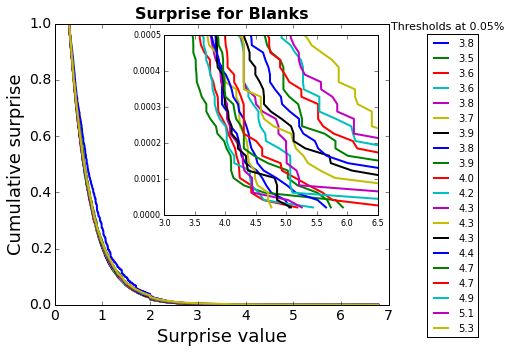

In [520]:
del AllSurp
Folder = '/home/matias/WORKSPACE/S2_git/data'    
#data = Folder + '/BlanksurpriseAll'
data = Folder + '/Blanksurprise'
a = load_obj(data)
AllSurp = a.surp_data

fig = figure(figsize = (8,5))

gs1 = gridspec.GridSpec(1, 6)
ax = fig.add_subplot(gs1[0:4])

#ax = fig.add_subplot(1,1,1)

# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.29, 0.39, 0.37, 0.5]
ax2 = fig.add_axes([left, bottom, width, height])


for i in arange(20):
    del sorted_datab
    sorted_datab = np.sort(AllSurp[i])  
    yvalsb=np.arange(len(sorted_datab))/float(len(sorted_datab))
    leg = where(1-yvalsb<0.0005)[0][0]
    val = round(sorted_datab[leg],1)
    #print(val, len(sorted_datab), leg)
    ax.plot( sorted_datab, 1-yvalsb,lw=2 , label =str(val))
    ax2.plot( sorted_datab, 1-yvalsb,lw=2 )
    
ax.legend(bbox_to_anchor=(1.1, 0.98),loc=2,fontsize = 10)
#ax.text(9.05,0.98,'Thresholds at 0.05%', size=11)
ax.text(7.05,0.98,'Thresholds at 0.05%', size=11)

ax.set_xlabel('Surprise value',size = 18)
ax.set_ylabel('Cumulative surprise',size = 18)
ax.tick_params( labelsize=14)
ax2.tick_params( labelsize=8)

#ax.set_title('Surprise for Blanks All',fontweight='bold', size = 16)
ax.set_title('Surprise for Blanks',fontweight='bold', size = 16)


ylim([0,0.0005])
xlim([3,6.5])

fig.tight_layout() 
#-------------------------------
#PDFfile = '/home/matias/WORKSPACE/OUTPUT/Surprise/BlankSurpriseAll'
PDFfile = '/home/matias/WORKSPACE/OUTPUT/Surprise/BlankSurprise'
fig.savefig(PDFfile +'.pdf', format='pdf')  

AttrDict({'organization': '100 values per neuron: 50 caudal, 50 rostral', 'surp_data': array([[ 1.10609473,  0.4333076 ,  0.4333076 , ...,  0.37807192,
         0.44702916,  0.37807192],
       [ 0.62922156,  0.62922156,  0.39955092, ...,  0.83070768,
         0.35726221,  0.35726221],
       [ 0.39659248,  0.39659248,  0.39659248, ...,  0.69600534,
         0.69600534,  0.49905447],
       ..., 
       [ 0.38236436,  0.55224659,  0.55224659, ...,  0.51416308,
         0.66607659,  0.66607659],
       [ 0.30947682,  0.4495116 ,  0.63544991, ...,  0.65492631,
         0.50863724,  0.73809437],
       [ 0.36692665,  0.36692665,  0.52143418, ...,  0.50360868,
         0.64479958,  0.57114489]]), 'good_neuron_list': ['exp22_m1s3_c3', 'exp22_m1s3_c37', 'exp22_m1s3_c50434850', 'exp22_m1s4_c13', 'exp22_m1s4_c138', 'exp22_m1s4_c4', 'exp22_m1s4_c480', 'exp22_m1s4_c484', 'exp22_m3s1_c66', 'exp22_m3s1_c77', 'exp22_m3s3_c21650', 'exp22_m3s3_c22054', 'exp22_m3s3_c33', 'exp22_m3s4_c1138', 'exp22_m3s

In [2279]:
print('   saving')
filesave =Folder +'/surprisedata' + str(expe)
save_obj(Surprise,filesave)
filesave

   saving


'/home/matias/WORKSPACE/S2_git/data/surprisedata30'

In [ ]:
#update spiketimes to wavedataAll
SelExp = [20] #[22,24,26,27,28,29,30,31,32] #Expe                                        #select experiment numbers!
Folder = '/home/matias/WORKSPACE/S2_git/data'    
for e in SelExp:

    data = Folder +'/wavedata'+ str(e)
    wavedata = load_obj(data)
    idx = list(wavedata.keys())
    datapsth = Folder +'/psthdata' + str(e)
    psthdata = load_obj(datapsth)

    for n in idx:
        wavedata[n].update(psthdata[n])    
            
    data = Folder +'data/datamix' + str(e)
    save_obj(wavedata, data)